# Polymer Electrolyte Data Mining Project:

## Step 3: Statistical learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
%config InlineBackend.figure_format='retina'

from sklearn.model_selection import train_test_split

# Set a random seed to ensure reproducibility across runs
SEED = 1
np.random.seed(seed=SEED)

In [2]:
font = {'size'   : 14}

mpl.rc('font', **font)

### Importing .CSV that's cleaned for statistical learning

Load the cleaned dataset with all the dropped columns and one-hot encoding

In [4]:
# Import data from master excel file
file_name = 'Cleaned_Final_Data-forML_6_2_2020.csv'
file_path = r'C:\Users\nicol\Box Sync\Personal\Research\DataMining_PolymerElectrolyte_Review\DataSpreadsheets\_' 
file = file_path + file_name
data_ML = pd.read_csv(file)
data_ML.head()

Polymer family                 Polymer  Comonomer percentage  \
0  carbonate, ether  polyethylene carbonate                  95.2   
1  carbonate, ether  polyethylene carbonate                  95.2   
2  carbonate, ether  polyethylene carbonate                  95.2   
3  carbonate, ether  polyethylene carbonate                  95.2   
4  carbonate, ether  polyethylene carbonate                  95.2   

         Anion  crystalline?  drying temp  drying time (h)  drying vacuum  \
0         TFSI             0           60             24.0              2   
1         TFSI             0           60             24.0              2   
2         TFSI             0           60             24.0              2   
3         TFSI             0           60             24.0              2   
4  N(SO2C2F5)2             0           60             24.0              2   

   Comonomer1 apol  Comonomer1 bpol  ...  anion ETA_dPsi_B  anion Kier1  \
0        11.416758        10.359242  ...               0.0         15.0   
1        11.416758        10.359242  ...               0.0         15.0   
2        11.416758        10.359242  ...               0.0         15.0   
3        11.416758        10.359242  ...               0.0         15.0   
4        11.416758        10.359242  ...               0.0         21.0   

   anion Kier2  solvent BP  approxTg  approxMW(kDa)  logCond60  \
0     3.785600        82.0      -3.0           37.0      -5.72   
1     3.785600        82.0     -20.0           37.0      -5.19   
2     3.785600        82.0     -33.0           37.0      -4.81   
3     3.785600        82.0     -62.0           37.0      -4.25   
4     5.273923        82.0     -14.0           37.0      -5.56   

   log Li:functional group  chain architecture_branched  \
0                -1.125997                            0   
1                -0.700029                            0   
2                -0.347846                            0   
3                 0.078123                            0   
4                -1.255939                            0   

   chain architecture_linear  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  

[5 rows x 237 columns]

In [5]:
data_ML.columns[0:100]

Index(['Polymer family', 'Polymer', 'Comonomer percentage', 'Anion',
       'crystalline?', 'drying temp', 'drying time (h)', 'drying vacuum',
       'Comonomer1 apol', 'Comonomer1 bpol', 'Comonomer1 nHBAcc',
       'Comonomer1 nHBDon', 'Comonomer1 nRot', 'Comonomer1 RotRatio',
       'Comonomer1 Vabc', 'Comonomer1 MW', 'Comonomer1 nAcid',
       'Comonomer1 nBase', 'Comonomer1 nAtom', 'Comonomer1 nHeavyAtom',
       'Comonomer1 nSpiro', 'Comonomer1 nBridgehead', 'Comonomer1 nHetero',
       'Comonomer1 nH', 'Comonomer1 nB', 'Comonomer1 nC', 'Comonomer1 nN',
       'Comonomer1 nO', 'Comonomer1 nS', 'Comonomer1 nP', 'Comonomer1 nF',
       'Comonomer1 nCl', 'Comonomer1 nBr', 'Comonomer1 nI', 'Comonomer1 nX',
       'Comonomer1 ETA_alpha', 'Comonomer1 AETA_alpha',
       'Comonomer1 ETA_shape_p', 'Comonomer1 ETA_shape_y',
       'Comonomer1 ETA_shape_x', 'Comonomer1 ETA_beta', 'Comonomer1 AETA_beta',
       'Comonomer1 ETA_beta_s', 'Comonomer1 AETA_beta_s',
       'Comonomer1 ETA_beta_ns

In [6]:
data_ML.columns[100:200]

Index(['Comonomer2 nN', 'Comonomer2 nO', 'Comonomer2 nS', 'Comonomer2 nP',
       'Comonomer2 nF', 'Comonomer2 nCl', 'Comonomer2 nBr', 'Comonomer2 nI',
       'Comonomer2 nX', 'Comonomer2 ETA_alpha', 'Comonomer2 AETA_alpha',
       'Comonomer2 ETA_shape_p', 'Comonomer2 ETA_shape_y',
       'Comonomer2 ETA_shape_x', 'Comonomer2 ETA_beta', 'Comonomer2 AETA_beta',
       'Comonomer2 ETA_beta_s', 'Comonomer2 AETA_beta_s',
       'Comonomer2 ETA_beta_ns', 'Comonomer2 AETA_beta_ns',
       'Comonomer2 ETA_beta_ns_d', 'Comonomer2 AETA_beta_ns_d',
       'Comonomer2 ETA_eta', 'Comonomer2 AETA_eta', 'Comonomer2 ETA_eta_L',
       'Comonomer2 AETA_eta_L', 'Comonomer2 ETA_eta_R',
       'Comonomer2 AETA_eta_R', 'Comonomer2 ETA_eta_RL',
       'Comonomer2 AETA_eta_RL', 'Comonomer2 ETA_eta_F',
       'Comonomer2 AETA_eta_F', 'Comonomer2 ETA_eta_FL',
       'Comonomer2 AETA_eta_FL', 'Comonomer2 ETA_eta_B',
       'Comonomer2 AETA_eta_B', 'Comonomer2 ETA_eta_BR',
       'Comonomer2 AETA_eta_BR', 'Com

In [7]:
data_ML.columns[200:]

Index(['anion ETA_eta_R', 'anion AETA_eta_R', 'anion ETA_eta_RL',
       'anion AETA_eta_RL', 'anion ETA_eta_F', 'anion AETA_eta_F',
       'anion ETA_eta_FL', 'anion AETA_eta_FL', 'anion ETA_eta_B',
       'anion AETA_eta_B', 'anion ETA_eta_BR', 'anion AETA_eta_BR',
       'anion ETA_dAlpha_A', 'anion ETA_dAlpha_B', 'anion ETA_epsilon_1',
       'anion ETA_epsilon_2', 'anion ETA_epsilon_3', 'anion ETA_epsilon_4',
       'anion ETA_epsilon_5', 'anion ETA_dEpsilon_A', 'anion ETA_dEpsilon_B',
       'anion ETA_dEpsilon_C', 'anion ETA_dEpsilon_D', 'anion ETA_dBeta',
       'anion AETA_dBeta', 'anion ETA_psi_1', 'anion ETA_dPsi_A',
       'anion ETA_dPsi_B', 'anion Kier1', 'anion Kier2', 'solvent BP',
       'approxTg', 'approxMW(kDa)', 'logCond60', 'log Li:functional group',
       'chain architecture_branched', 'chain architecture_linear'],
      dtype='object')

Drop additional columns that were used for visualization but will not be used for statistical learning.

In [8]:
dropCol = ['Polymer family', 'Polymer','Anion',] 

data_ML_sparse = data_ML.drop(columns = dropCol)

In [9]:
print(f'Full DataFrame shape: {data_ML.shape}')
print(f'Sparse DataFrame shape: {data_ML_sparse.shape}')

Full DataFrame shape: (271, 237)
Sparse DataFrame shape: (271, 234)


### Drop additonal highly-correlated features

In [10]:
corr_matrix = data_ML_sparse.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

data_ML_corr = data_ML_sparse.drop(data_ML_sparse[to_drop], axis=1)

data_ML_corr

Comonomer percentage  crystalline?  drying temp  drying time (h)  \
0                   95.20             0           60             24.0   
1                   95.20             0           60             24.0   
2                   95.20             0           60             24.0   
3                   95.20             0           60             24.0   
4                   95.20             0           60             24.0   
..                    ...           ...          ...              ...   
266                 50.00             0           60             24.0   
267                 50.00             0           60             24.0   
268                 78.30             0           65              6.0   
269                 82.94             0           65              6.0   
270                 71.15             0           65              6.0   

     drying vacuum  Comonomer1 apol  Comonomer1 bpol  Comonomer1 nHBAcc  \
0                2        11.416758        10.359242                  3   
1                2        11.416758        10.359242                  3   
2                2        11.416758        10.359242                  3   
3                2        11.416758        10.359242                  3   
4                2        11.416758        10.359242                  3   
..             ...              ...              ...                ...   
266              2        23.962688        19.523312                  2   
267              2        21.761102        19.252898                  3   
268              2         8.142758         7.755242                  1   
269              2         8.142758         7.755242                  1   
270              2         8.142758         7.755242                  1   

     Comonomer1 nHBDon  Comonomer1 nRot  ...  anion ETA_dBeta  \
0                    0                0  ...             -3.5   
1                    0                0  ...             -3.5   
2                    0                0  ...             -3.5   
3                    0                0  ...             -3.5   
4                    0                0  ...             -7.5   
..                 ...              ...  ...              ...   
266                  0                6  ...             -3.5   
267                  0                6  ...             -3.5   
268                  0                0  ...             -2.0   
269                  0                0  ...             -2.0   
270                  0                0  ...             -2.0   

     anion AETA_dBeta  anion ETA_psi_1  anion ETA_dPsi_B  solvent BP  \
0           -0.233333         0.288604               0.0        82.0   
1           -0.233333         0.288604               0.0        82.0   
2           -0.233333         0.288604               0.0        82.0   
3           -0.233333         0.288604               0.0        82.0   
4           -0.357143         0.276687               0.0        82.0   
..                ...              ...               ...         ...   
266         -0.233333         0.288604               0.0        61.2   
267         -0.233333         0.288604               0.0        61.2   
268         -0.250000         0.277203               0.0        82.0   
269         -0.250000         0.277203               0.0        82.0   
270         -0.250000         0.277203               0.0        82.0   

     approxTg  approxMW(kDa)  logCond60  log Li:functional group  \
0        -3.0           37.0  -5.720000                -1.125997   
1       -20.0           37.0  -5.190000                -0.700029   
2       -33.0           37.0  -4.810000                -0.347846   
3       -62.0           37.0  -4.250000                 0.078123   
4       -14.0           37.0  -5.560000                -1.255939   
..        ...            ...        ...                      ...   
266     -20.0          190.0  -5.836820                -1.301030   
267     -55.0           17.0  -4.5287

In [11]:
print(f'Correlated dropped DataFrame shape: {data_ML_corr.shape}')

Correlated dropped DataFrame shape: (271, 176)


### Splitting data into X and Y (independent variable: Conductivity at 60 $^{\circ}$C)

Note, we will want to only have ONE Y variable within the dataframe - currently we have conductivities at a bunch of temperatures, but those are necessarily related to each other somewhat.

In [12]:
# split into X and Y elements, with the conductivity we're comparing as Y and all descriptors as X
data_ML_X = data_ML_corr.drop(columns = 'logCond60')
data_ML_Y = pd.DataFrame(data_ML_corr['logCond60'])
data_ML_Y.head()

logCond60
0      -5.72
1      -5.19
2      -4.81
3      -4.25
4      -5.56

### Dividing data into training and test sets

This must be done to ensure we do not test our fit on the same data that was used to train the fit.

------------------------------------------------
#### Note: This notebook assumes can split the data randomly, however, also looked at grouping by polymer formula and anion (see additional notebooks)

------------------------------------------------

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data_ML_X, data_ML_Y, test_size=0.2, random_state=SEED)

print(X_train.shape)
print(X_test.shape)

(216, 175)
(55, 175)


In [14]:
y_train.head()

logCond60
108  -6.690204
139  -4.838063
117  -5.541343
267  -4.528742
179  -6.656500

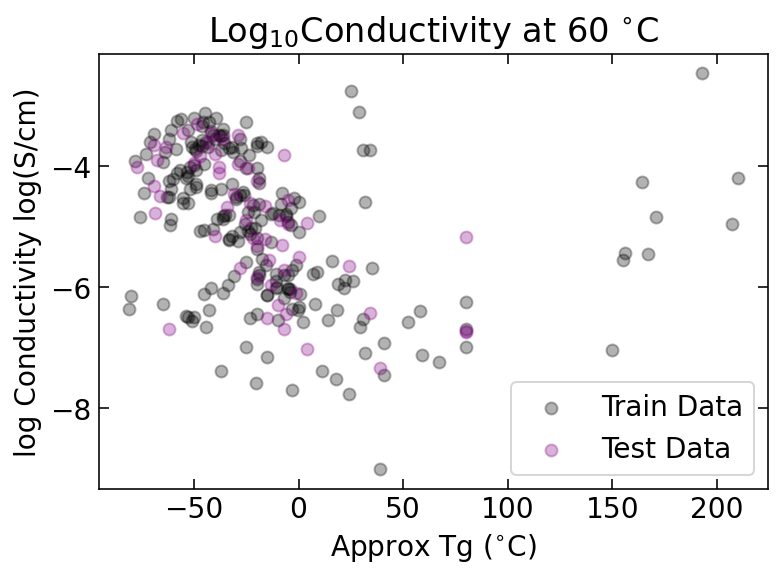

In [15]:
# plotting the train and test data to see what was chosen
plot_colors = ['black','teal','purple','blue','skyblue','pink','aqua','indianred','green',
               'sandybrown','gold','lightgreen','palegoldenrod']
plt.figure()
plt.scatter(X_train['approxTg'],y_train['logCond60'],alpha=0.3,c=plot_colors[0],label='Train Data')
plt.scatter(X_test['approxTg'],y_test['logCond60'],alpha=0.3,c=plot_colors[2],label='Test Data')
plt.ylabel(r'log Conductivity log(S/cm)')
plt.xlabel(r'Approx Tg ($^{\circ}$C)')
plt.title('Log$_{10}$Conductivity at 60 $^{\circ}$C')
plt.tick_params(which='major',direction='in', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(which='minor',direction='in', length=3, left=True, right=True)
plt.legend()
plt.show()

#### Save the split datasets to .CSV for future reference

In [59]:
train_name = 'Train_dropCorr_6_17_2020.csv'
test_name = 'Test__dropCorr_6_17_2020.csv'
file_path = r'C:\Users\nicol\Box Sync\Personal\Research\DataMining_PolymerElectrolyte_Review\DataSpreadsheets\ML_DataSplits\_' 
file_train = file_path + train_name
file_test = file_path + test_name

train_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test,y_test],axis=1)
train_data.to_csv(file_train, sep=',',index = False)
test_data.to_csv(file_test, sep=',',index = False)

## Use Pipeline feature to scale, cross-validate, and fit models

"Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors." https://scikit-learn.org/stable/modules/compose.html

Also, import all possible ML models I might be interested in. Note: Dummy, Ridge, (Lasso...?) and Trees (Extra trees and Random forest) are most interesting because they allow you to visualize most important descriptors.

useful link for comparing algorithms consistently: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

Useful discussion on ridge vs lasso: https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

In [16]:
from collections import OrderedDict

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sklearn

Define any parameters that will be used for all model fits

In [17]:
scoring='neg_mean_squared_error'

Note on scoring parameter: choosing to use MSE instead of r^2, based somewhat off of this website: https://data.library.virginia.edu/is-r-squared-useless/

In [18]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = SEED)

## Feature selection using RFECV and random forest, before training all models

Choose RF model, since that seems to perform the best. Use recursive feature selection with cross-validation to choose number of features

In [19]:
from sklearn.feature_selection import RFECV

In [20]:
rf_elim = RandomForestRegressor(random_state=SEED)

rfecv = RFECV(estimator=rf_elim, step=1, cv=kfold,scoring='neg_mean_squared_error')
rfecv.fit(X_train, np.ravel(y_train))

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RFECV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
      estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators='warn', n_jobs=None,
                                      oob_score=False, random_state=1,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [21]:
rfecv.n_features_

37

In [22]:
rfecv.ranking_

array([ 13,   1,  12,   1,   1,  45,  47,  46,  98,  74,  23,  88, 104,
       106, 102,  76, 116,  75,  56,  86, 120, 111, 103,  90, 134,  92,
        68,  35,   1, 115,   6,   1,  44,  42,   1, 126,   1,   1,  33,
         1,   1,   1,   1,  51,  66,  57,   1,  91,  43,   1,   8,  50,
        79,   1,  60,  87,   1,  85,  16,   1,   1, 121,  96,  26,   1,
       112,  77,   5, 124, 125, 123,  67, 136,  48, 100,  70,  93, 113,
        99, 107,  97, 118,  32,   1,  80, 119,  21,   7,  17,  55,  84,
        78,   3,  19,   1,  52,  20,  36,  24,   1,   2,   1,   4,   1,
        40,   9, 108,   1,   1,  28,  64,  37,  82,  69,   1,   1,  71,
        63, 101,  59,  22,   1, 110,  65,  81, 109,  53,  89, 138, 139,
       135, 128, 105,  73, 122,   1,  61,  72, 131, 127,   1,  41, 130,
         1,  18,  27,  15,  34, 129, 133,  30,   1,   1,  11,  14,  94,
        38,  62,  83,  10,  58,  49, 137,  54, 117, 114,  39,  25,  29,
        95,  31,   1,   1,   1, 132])

In [23]:
feature_RFE = pd.DataFrame({'Feature':X_train.columns,'Ranking':rfecv.ranking_})
feature_RFE

Feature  Ranking
0           Comonomer percentage       13
1                   crystalline?        1
2                    drying temp       12
3                drying time (h)        1
4                  drying vacuum        1
..                           ...      ...
170                   solvent BP       31
171                     approxTg        1
172                approxMW(kDa)        1
173      log Li:functional group        1
174  chain architecture_branched      132

[175 rows x 2 columns]

In [24]:
sorted_feature_RFE = feature_RFE.sort_values(by='Ranking',ascending=True)
sorted_feature_RFE

Feature  Ranking
49   Comonomer1 ETA_epsilon_1        1
103     Comonomer2 AETA_eta_B        1
40       Comonomer1 ETA_eta_F        1
101    Comonomer2 AETA_eta_FL        1
46     Comonomer1 AETA_eta_BR        1
..                        ...      ...
130         anion nBridgehead      135
72              Comonomer2 nB      136
162       anion ETA_epsilon_3      137
128               anion nBase      138
129              anion nSpiro      139

[175 rows x 2 columns]

In [25]:
sorted_feature_RFE[0:rfecv.n_features_]

Feature  Ranking
49    Comonomer1 ETA_epsilon_1        1
103      Comonomer2 AETA_eta_B        1
40        Comonomer1 ETA_eta_F        1
101     Comonomer2 AETA_eta_FL        1
46      Comonomer1 AETA_eta_BR        1
99       Comonomer2 AETA_eta_F        1
94       Comonomer2 AETA_eta_L        1
39      Comonomer1 AETA_eta_RL        1
173    log Li:functional group        1
28      Comonomer1 ETA_shape_y        1
83      Comonomer2 ETA_shape_p        1
59       Comonomer1 AETA_dBeta        1
31        Comonomer1 AETA_beta        1
37       Comonomer1 AETA_eta_L        1
64           Comonomer2 nHBAcc        1
34     Comonomer1 AETA_beta_ns        1
41       Comonomer1 AETA_eta_F        1
60        Comonomer1 ETA_psi_1        1
107    Comonomer2 ETA_dAlpha_B        1
114       Comonomer2 ETA_dBeta        1
1                 crystalline?        1
53    Comonomer1 ETA_epsilon_5        1
3              drying time (h)        1
4                drying vacuum        1
172              approxMW(kDa)        1
171                   approxTg        1
56   Comonomer1 ETA_dEpsilon_C        1
42      Comonomer1 AETA_eta_FL        1
152            anion ETA_eta_L        1
151             anion AETA_eta        1
143          anion ETA_shape_x        1
140           anion AETA_alpha        1
135                   anion nO        1
121               anion nHBAcc        1
115      Comonomer2 AETA_dBeta        1
108   Comonomer2 ETA_epsilon_1        1
36         Comonomer1 AETA_eta        1

In [26]:
X_train_RFE = X_train[np.array(sorted_feature_RFE['Feature'][0:rfecv.n_features_])]

In [27]:
X_train_RFE

Comonomer1 ETA_epsilon_1  Comonomer2 AETA_eta_B  Comonomer1 ETA_eta_F  \
108                  0.500000               0.028832              1.812741   
139                  0.514815               0.022169             18.826984   
117                  0.460000               0.000000              0.737606   
267                  0.556522               0.000000              3.362909   
179                  0.518519               0.000000              0.811080   
..                        ...                    ...                   ...   
203                  0.518519               0.000000              0.811080   
255                  0.568699               0.003394             17.894376   
72                   0.536667               0.013269              2.872384   
235                  0.573077               0.009650              5.637189   
37                   0.582143               0.020463             10.443239   

     Comonomer2 AETA_eta_FL  Comonomer1 AETA_eta_BR  Comonomer2 AETA_eta_F  \
108                0.161061            2.883159e-02               0.362548   
139                0.214983            2.904890e-02               0.753079   
117                0.190313            0.000000e+00               0.245869   
267                0.328304            0.000000e+00               0.452204   
179                0.214804            0.000000e+00               0.270360   
..                      ...                     ...                    ...   
203                0.214804            0.000000e+00               0.270360   
255                0.235459            1.044916e-16               0.460931   
72                 0.140642            1.326914e-02               0.359048   
235                0.208049            9.650286e-03               0.512472   
37                 0.136218            2.906316e-02               0.522162   

     Comonomer2 AETA_eta_L  Comonomer1 AETA_eta_RL  log Li:functional group  \
108               0.292950                0.454011                -0.778151   
139               0.259417                0.474400                -0.255273   
117               0.281091                0.471405                -1.176091   
267               0.143100                0.490468                -1.477121   
179               0.256600                0.471405                -1.204120   
..                     ...                     ...                      ...   
203               0.256600                0.471405                -1.079181   
255               0.246849                0.497477                -1.204120   
72                0.335365                0.476008                -1.469734   
235               0.274502                0.482551                -1.070581   
37                0.339029                0.475248                -0.602060   

     Comonomer1 ETA_shape_y  ...  Comonomer1 AETA_eta_FL  anion ETA_eta_L  \
108                0.208333  ...                0.161061         3.002692   
139                0.230769  ...                0.214983         3.002692   
117                0.000000  ...                0.190313         1.498724   
267                0.000000  ...                0.183538         3.002692   
179                0.000000  ...                0.214804         1.745743   
..                      ...  ...                     ...              ...   
203                0.000000  ...                0.214804         1.498724   
255                0.000000  ...                0.165761         3.002692   
72                 0.136364  ...                0.140642         1.951800   
235                0.081633  ...                0.208049         3.002692   
37                 0.205128  ...                0.136218         3.002692   

     anion AETA_eta  anion ETA_shape_x  anion AETA_alpha  anion nO  \
108        0.692793           0.436137          0.407619         4   
139        0.692793           0.436137          0.407619         4   
117        0.493268           0.417910         

In [28]:
X_test_RFE = X_test[np.array(sorted_feature_RFE['Feature'][0:rfecv.n_features_])]

Save data frames of smaller test and train sets

In [29]:
train_name = 'Train_dropCorr_RFE_7-12_2020.csv'
test_name = 'Test__dropCorr_RFE_7-12_2020.csv'
file_path = r'C:\Users\nicol\Box Sync\Personal\Research\DataMining_PolymerElectrolyte_Review\DataSpreadsheets\ML_DataSplits\_' 
file_train = file_path + train_name
file_test = file_path + test_name

train_data_RFE = pd.concat([X_train_RFE,y_train],axis=1)
test_data_RFE = pd.concat([X_test_RFE,y_test],axis=1)
train_data_RFE.to_csv(file_train, sep=',',index = False)
test_data_RFE.to_csv(file_test, sep=',',index = False)

#### Explore correlation matrix of reduced feature set

In [29]:
data_for_corr = data_ML_X[np.array(sorted_feature_RFE['Feature'][0:rfecv.n_features_])]

In [30]:
data_for_corr.columns

Index(['Comonomer1 ETA_epsilon_1', 'Comonomer2 AETA_eta_B',
       'Comonomer1 ETA_eta_F', 'Comonomer2 AETA_eta_FL',
       'Comonomer1 AETA_eta_BR', 'Comonomer2 AETA_eta_F',
       'Comonomer2 AETA_eta_L', 'Comonomer1 AETA_eta_RL',
       'log Li:functional group', 'Comonomer1 ETA_shape_y',
       'Comonomer2 ETA_shape_p', 'Comonomer1 AETA_dBeta',
       'Comonomer1 AETA_beta', 'Comonomer1 AETA_eta_L', 'Comonomer2 nHBAcc',
       'Comonomer1 AETA_beta_ns', 'Comonomer1 AETA_eta_F',
       'Comonomer1 ETA_psi_1', 'Comonomer2 ETA_dAlpha_B',
       'Comonomer2 ETA_dBeta', 'crystalline?', 'Comonomer1 ETA_epsilon_5',
       'drying time (h)', 'drying vacuum', 'approxMW(kDa)', 'approxTg',
       'Comonomer1 ETA_dEpsilon_C', 'Comonomer1 AETA_eta_FL',
       'anion ETA_eta_L', 'anion AETA_eta', 'anion ETA_shape_x',
       'anion AETA_alpha', 'anion nO', 'anion nHBAcc', 'Comonomer2 AETA_dBeta',
       'Comonomer2 ETA_epsilon_1', 'Comonomer1 AETA_eta'],
      dtype='object')

In [31]:
column_order = ['approxMW(kDa)', 'approxTg','log Li:functional group','drying time (h)', 'drying vacuum','crystalline?',
               'Comonomer1 ETA_epsilon_1','Comonomer1 ETA_eta_F','Comonomer1 AETA_eta_BR',
               'Comonomer1 AETA_eta_RL','Comonomer1 ETA_shape_y','Comonomer1 AETA_dBeta',
                'Comonomer1 AETA_beta', 'Comonomer1 AETA_eta_L','Comonomer1 AETA_beta_ns', 
                'Comonomer1 AETA_eta_F','Comonomer1 ETA_psi_1',  'Comonomer1 ETA_epsilon_5',
               'Comonomer1 ETA_dEpsilon_C', 'Comonomer1 AETA_eta_FL','Comonomer1 AETA_eta',
               'Comonomer2 AETA_eta_B','Comonomer2 AETA_eta_FL','Comonomer2 AETA_eta_F',
                'Comonomer2 ETA_shape_p','Comonomer2 nHBAcc','Comonomer2 ETA_dAlpha_B',
                'Comonomer2 ETA_dBeta','Comonomer2 AETA_dBeta','Comonomer2 ETA_epsilon_1',
                'anion ETA_eta_L', 'anion AETA_eta', 'anion ETA_shape_x','anion AETA_alpha', 'anion nO', 'anion nHBAcc', ]

In [32]:
data_for_corr = data_for_corr.reindex(columns=column_order)

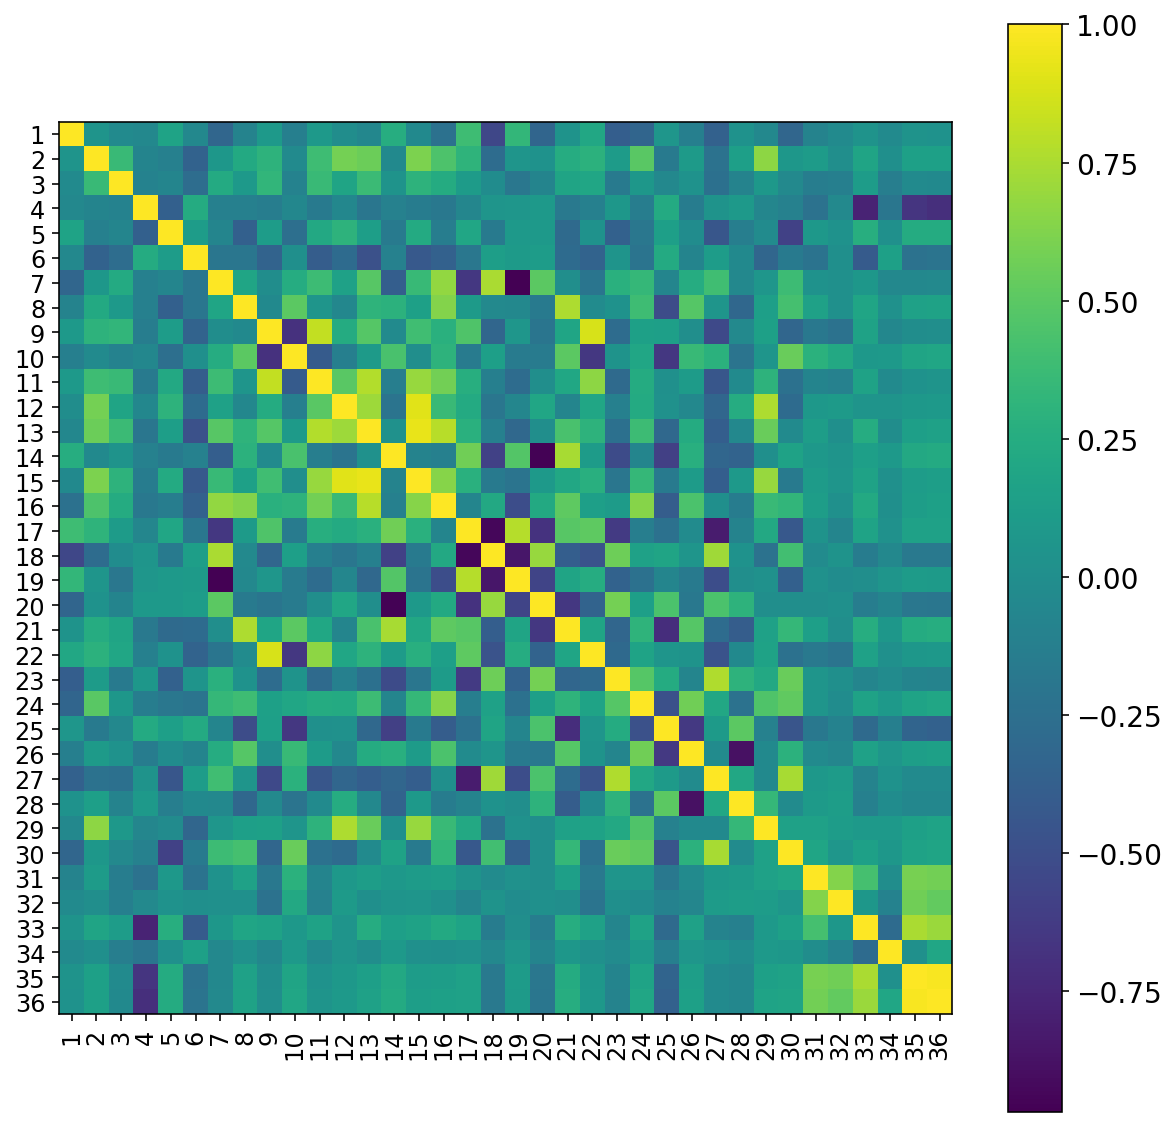

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(data_for_corr.corr())
# plt.title('Correlation matrix', fontsize = 15)
column = np.arange(1,37)
plt.xticks(range(data_for_corr.shape[1]), column, fontsize=12,rotation=90) #data_for_corr.columns
plt.yticks(range(data_for_corr.shape[1]), column, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.tight_layout()
plt.show()

### Now, train models with smaller feature set

#### Dummy regression fitting

Dummy regression uses the mean of the training targets as the prediction estimate. This is the regression scoring that needs to be beat if a model is to be successful.

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html#sklearn.dummy.DummyRegressor

In [35]:
pipe_dummy = make_pipeline(StandardScaler(), Normalizer(), DummyRegressor())
dummy_RFE = cross_validate(pipe_dummy,X_train_RFE,y_train,scoring=scoring,cv=kfold,return_train_score=True)
test_scores_dummy = -np.array(dummy_RFE['test_score'])
print('Test scores (MSE):', test_scores_dummy)
train_scores_dummy = -np.array(dummy_RFE['train_score'])
print('Train scores (MSE):', train_scores_dummy)
mean_test_scores_dummy = np.mean(-np.array(dummy_RFE['test_score']))
print('Mean test score (MSE):', mean_test_scores_dummy)
mean_train_scores_dummy = np.mean(-np.array(dummy_RFE['train_score']))
print('Mean train score (MSE):', mean_train_scores_dummy)



Test scores (MSE): [1.31281102 1.61718479 1.94468276 0.86019468 1.75143053]
Train scores (MSE): [1.52382715 1.45010261 1.36485139 1.63414138 1.41738735]
Mean test score (MSE): 1.4972607547351828
Mean train score (MSE): 1.4780619745516697


#### Ridge regression

In [36]:
pipe_ridge = make_pipeline(StandardScaler(), Normalizer(), Ridge(random_state=SEED))
param_grid_ridge = {'ridge__alpha':[1e-7,1e-5,1e-3,5e-3,1e-2,5e-2,1e-1,.5,1,10]}
ridge_clf = GridSearchCV(pipe_ridge,param_grid_ridge,scoring=scoring, cv=kfold,return_train_score=True)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean test scores (ridge): [0.68260621 0.67856363 0.62264906 0.61088315 0.60755501 0.61424166
 0.61919095 0.64074469 0.67743803 1.00181754]
Mean train scores (ridge): [0.32216237 0.32217064 0.32660051 0.3385963  0.34655781 0.37390909
 0.38929142 0.44353762 0.49353966 0.88139791]


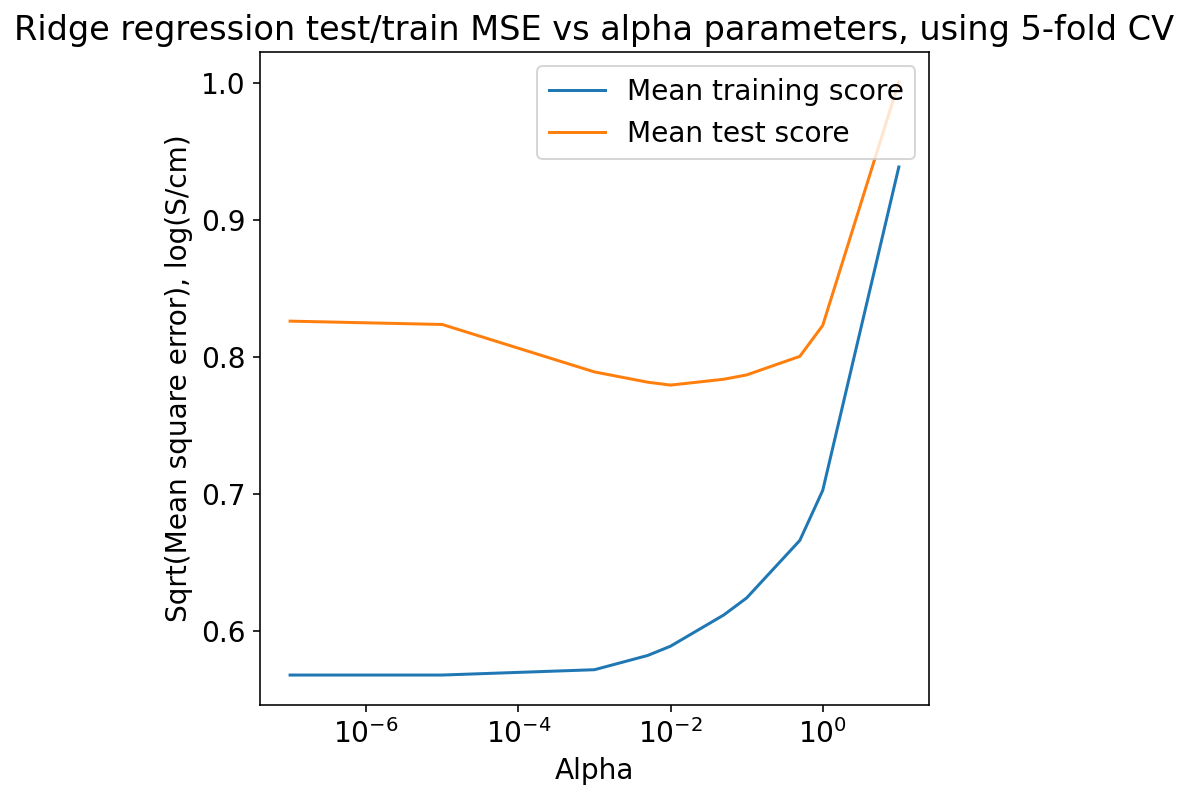

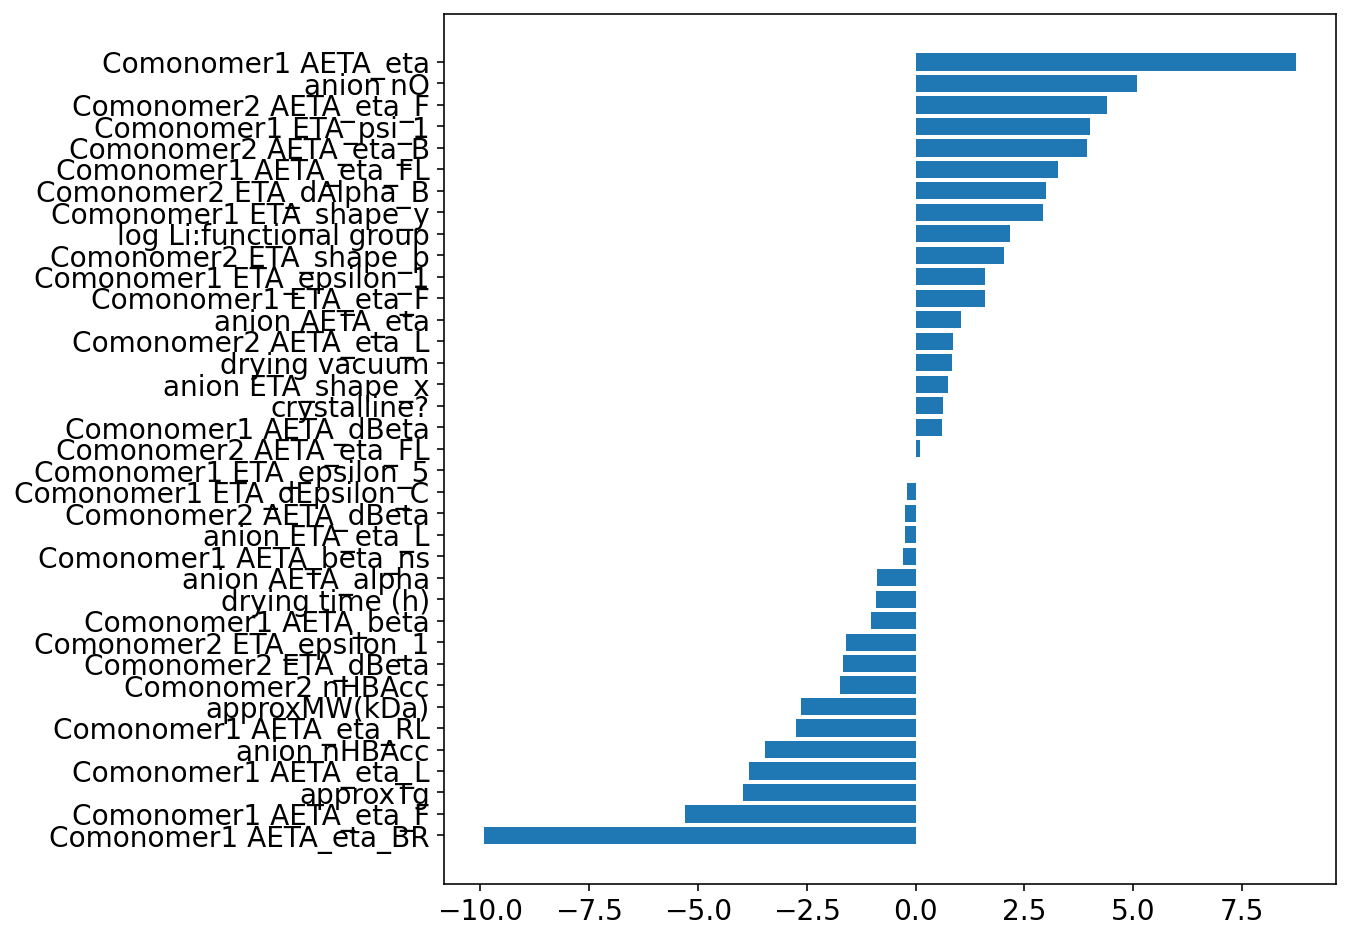

In [37]:
ridge_clf.fit(X_train_RFE,y_train)

mean_test_scores = -np.array(ridge_clf.cv_results_['mean_test_score'])
print('Mean test scores (ridge):',mean_test_scores)

mean_train_scores = -np.array(ridge_clf.cv_results_['mean_train_score'])
print('Mean train scores (ridge):',mean_train_scores)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Ridge regression test/train MSE vs alpha parameters, using 5-fold CV')
plt.plot(param_grid_ridge['ridge__alpha'], (np.sqrt(mean_train_scores)),label='Mean training score')
plt.plot(param_grid_ridge['ridge__alpha'], (np.sqrt(mean_test_scores)), label='Mean test score')
plt.legend(loc='upper right')
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('Sqrt(Mean square error), log(S/cm)')#Mean square error
# fig.tight_layout()
plt.show()


ridge_best_rfe = ridge_clf.best_estimator_
ridge_best_rfe.fit(X_train_RFE,y_train)

ridge_coefs_rfe = ridge_best_rfe.named_steps['ridge'].coef_[0]
Descriptor_rr_df_rfe = pd.DataFrame()
Descriptor_rr_df_rfe['descriptor'] = X_train_RFE.columns
Descriptor_rr_df_rfe['ridge_coefficient'] = ridge_coefs_rfe

ordered_importance_rr_rfe = Descriptor_rr_df_rfe.sort_values(by = ['ridge_coefficient'],ascending = False)
plt.figure(figsize=(8,8))
ax=plt.axes()
ax.barh(ordered_importance_rr_rfe['descriptor'],ordered_importance_rr_rfe['ridge_coefficient'])
ax.invert_yaxis()
# plt.xticks(rotation=90)
# make_axes_area_auto_adjustable(ax)
plt.show()

In [38]:
ridge_best_rfe

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('normalizer', Normalizer(copy=True, norm='l2')),
                ('ridge',
                 Ridge(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=1,
                       solver='auto', tol=0.001))],
         verbose=False)

#### Random Forest regression

In [39]:
pipe_rf = make_pipeline(StandardScaler(), Normalizer(), RandomForestRegressor(random_state=SEED))
param_grid_rf = {'randomforestregressor__n_estimators':[10,50,100,500],
                'randomforestregressor__max_depth':[4,6,8,10]}

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean test scores: [0.56605678 0.53331783 0.5367929  0.53688391 0.48323863 0.45226478
 0.44701463 0.45059659 0.45381584 0.41512724 0.42402797 0.42324841
 0.45175802 0.41488449 0.41864241 0.41942458]
Mean train scores: [0.24325075 0.22789551 0.22590212 0.22337223 0.126501   0.10733132
 0.10228803 0.09850444 0.10447597 0.07839784 0.0731889  0.06927899
 0.09771484 0.07265476 0.06753324 0.0636506 ]


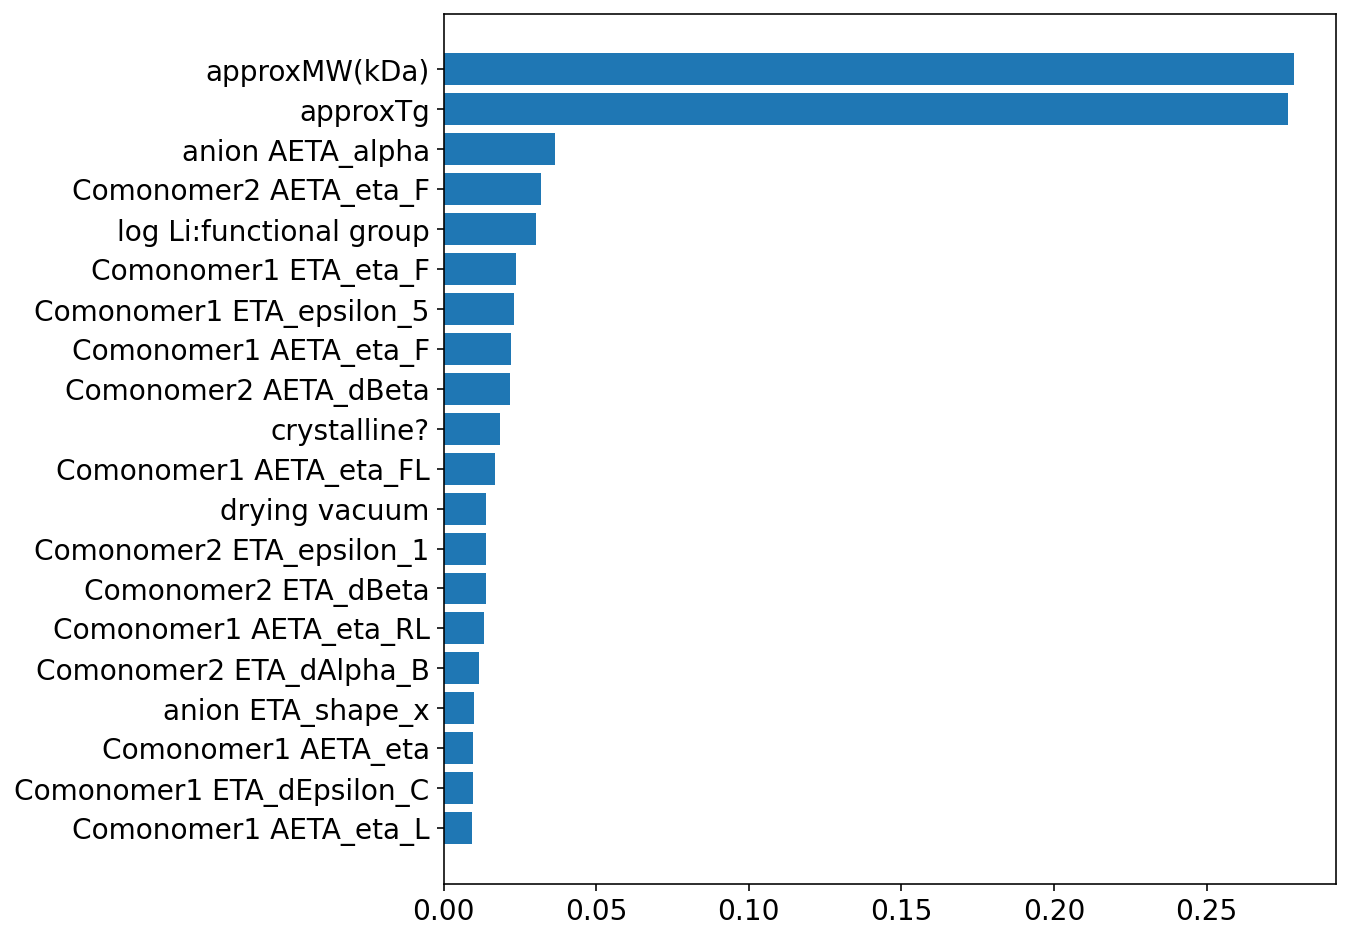

In [40]:
rf_grid_rfe = GridSearchCV(pipe_rf,param_grid_rf,scoring=scoring, cv=kfold,return_train_score=True)

rf_grid_rfe.fit(X_train_RFE,np.ravel(y_train))
mean_test_scores_rf= -np.array(rf_grid_rfe.cv_results_['mean_test_score'])
print('Mean test scores:', mean_test_scores_rf)
mean_train_scores_rf = -np.array(rf_grid_rfe.cv_results_['mean_train_score'])
print('Mean train scores:', mean_train_scores_rf)

rf_grid_df_rfe = pd.DataFrame.from_dict(rf_grid_rfe.cv_results_)
# rf_grid_df

rf_best_rfe = rf_grid_rfe.best_estimator_
rf_best_rfe.fit(X_train_RFE,np.ravel(y_train))

importance_rfe = rf_best_rfe.named_steps['randomforestregressor'].feature_importances_

Descriptor_rf_df_rfe = pd.DataFrame()
Descriptor_rf_df_rfe['descriptor'] = X_train_RFE.columns
Descriptor_rf_df_rfe['rf_coefficient'] = importance_rfe
# Descriptor_rf_df.head()

ordered_importance_rf_rfe = Descriptor_rf_df_rfe.sort_values(by = ['rf_coefficient'],ascending = False)

plt.figure(figsize=(8,8))
ax=plt.axes()
ax.barh(ordered_importance_rf_rfe['descriptor'][0:20],ordered_importance_rf_rfe['rf_coefficient'][0:20])
ax.invert_yaxis()
plt.show()

In [41]:
rf_best_rfe

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('normalizer', Normalizer(copy=True, norm='l2')),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=10, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=50, n_jobs=None,
                                       oob_score=False, random_state=1,
                                       verbose=0, warm_start=False))],
         verbose=False)

#### Gradient Boosting regression

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean test scores (MSE): [0.63168703 0.45321426 0.44490928 0.43999791 0.439751   0.58034123
 0.43447229 0.43152825 0.4302231  0.4302231  0.53175847 0.48034148
 0.48014064 0.48013973 0.48013973 0.50398857 0.47009975 0.47129458
 0.47129458 0.47129458]
Mean train scores (MSE): [3.59328540e-01 2.47035191e-02 6.90748268e-03 7.06359444e-06
 9.96292498e-08 2.26920363e-01 7.67707514e-04 8.51858855e-05
 9.96239456e-08 9.96239456e-08 1.88765186e-01 6.60279062e-05
 1.00274657e-07 9.91370679e-08 9.91370679e-08 1.80835100e-01
 4.17746612e-05 9.93309358e-08 9.93309358e-08 9.93309358e-08]


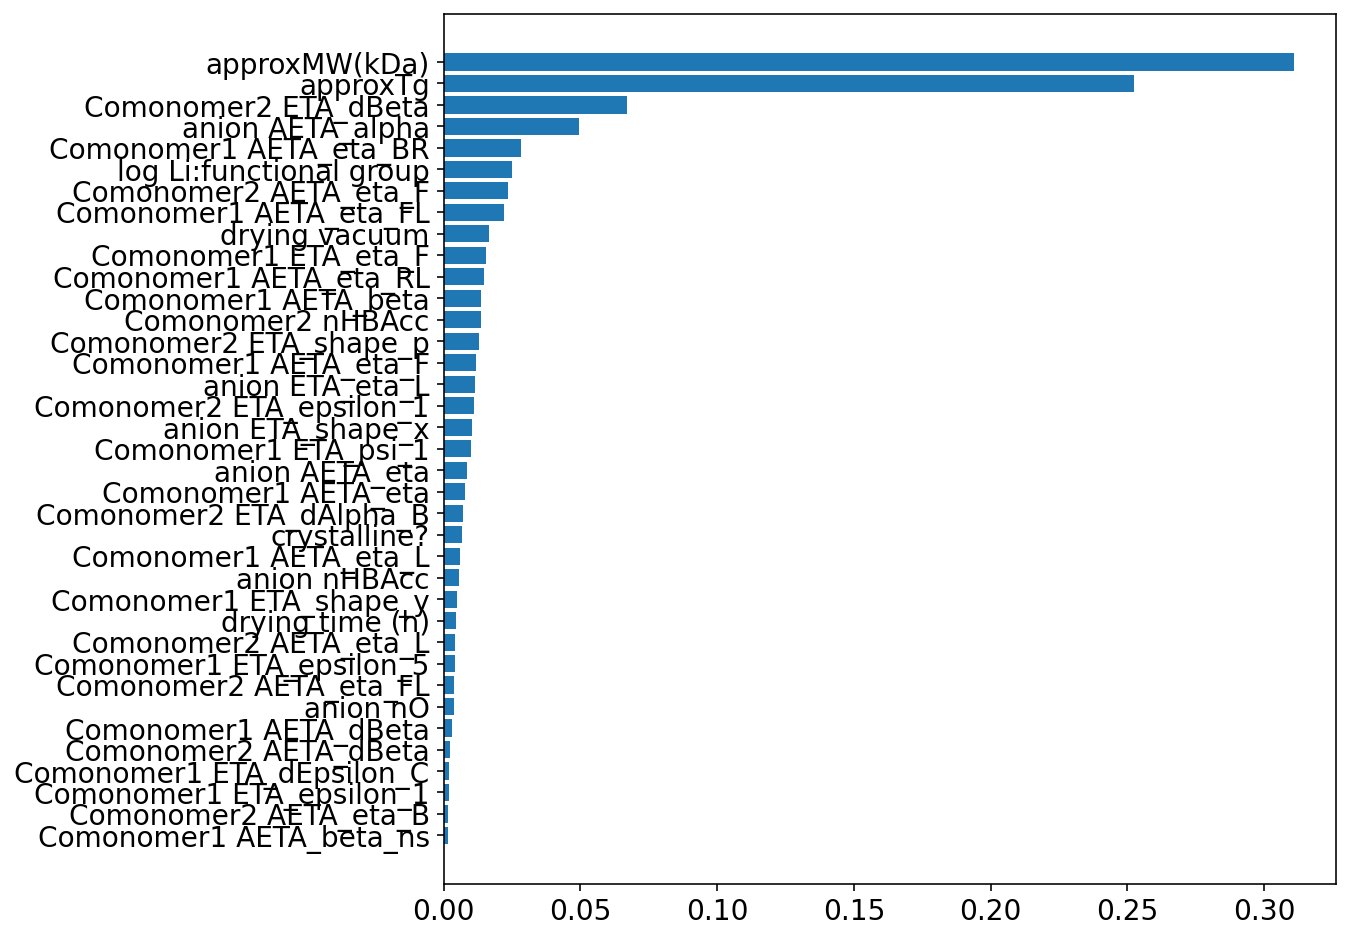

In [42]:
pipe_gbr = make_pipeline(StandardScaler(), Normalizer(), GradientBoostingRegressor(random_state=SEED))
param_grid_gbr = {'gradientboostingregressor__n_estimators':[10,50,100,500,1000],
                'gradientboostingregressor__max_depth':[4,6,8,10]}
gbr_grid = GridSearchCV(pipe_gbr,param_grid_gbr,scoring=scoring, cv=kfold,return_train_score=True)
gbr_grid.fit(X_train_RFE,np.ravel(y_train))

mean_test_scores_gbr= -np.array(gbr_grid.cv_results_['mean_test_score'])
print('Mean test scores (MSE):', mean_test_scores_gbr)
mean_train_scores_gbr = -np.array(gbr_grid.cv_results_['mean_train_score'])
print('Mean train scores (MSE):', mean_train_scores_gbr)

gb_best = gbr_grid.best_estimator_
gb_best.fit(X_train_RFE,np.ravel(y_train))

importance_gb = gb_best.named_steps['gradientboostingregressor'].feature_importances_
Descriptor_gb_df = pd.DataFrame()
Descriptor_gb_df['descriptor'] = X_train_RFE.columns
Descriptor_gb_df['gb_coefficient'] = importance_gb
ordered_importance_gb = Descriptor_gb_df.sort_values(by = ['gb_coefficient'],ascending = False)
plt.figure(figsize=(8,8))
ax=plt.axes()
ax.barh(ordered_importance_gb['descriptor'],ordered_importance_gb['gb_coefficient'])
ax.invert_yaxis()
plt.show()

In [43]:
gb_best

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('normalizer', Normalizer(copy=True, norm='l2')),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                           init=None, learning_rate=0.1,
                                           loss='ls', max_depth=6,
                                           max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=500,
          

#### Extra Trees regression

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean test scores: [0.65590849 0.59149063 0.60173316 0.61207964 0.54496673 0.49152593
 0.47973694 0.47892782 0.51105003 0.43129471 0.42672773 0.4205898
 0.47103869 0.41565531 0.40679469 0.40055789]
Mean train scores: [0.42768458 0.38115127 0.38597735 0.38694945 0.19758343 0.15711801
 0.15681491 0.15369487 0.063712   0.04565002 0.04628029 0.04566535
 0.01982402 0.01070511 0.00979872 0.00920479]


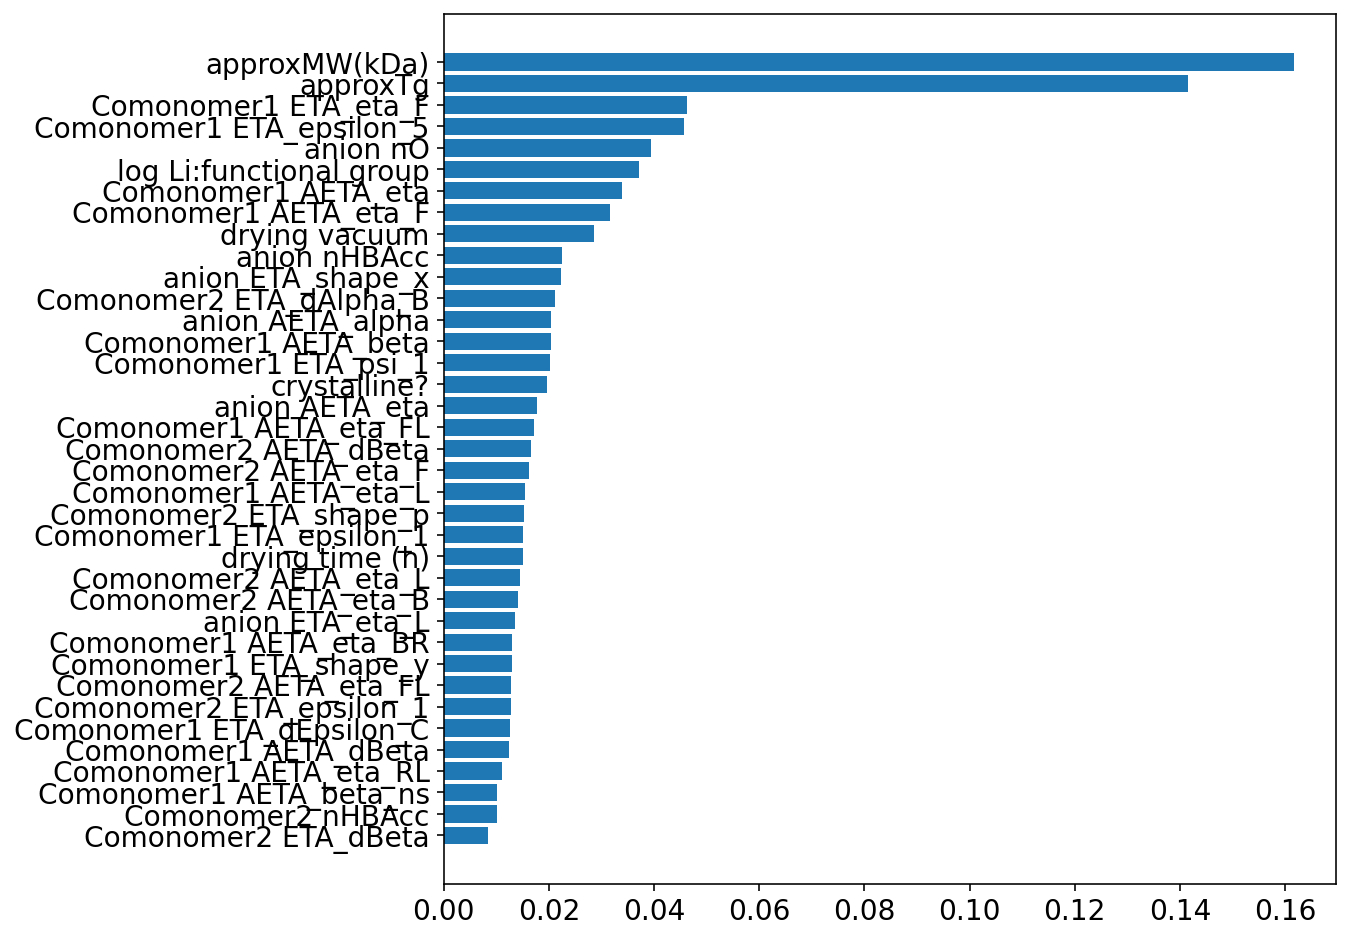

In [44]:
pipe_etr = make_pipeline(StandardScaler(), Normalizer(), ExtraTreesRegressor(random_state=SEED))
param_grid_etr = {'extratreesregressor__n_estimators':[10,50,100,500],
                'extratreesregressor__max_depth':[4,6,8,10]}
etr_grid_rfe = GridSearchCV(pipe_etr,param_grid_etr,scoring=scoring, cv=kfold,return_train_score=True)
etr_grid_rfe.fit(X_train_RFE,np.ravel(y_train))

mean_test_scores_etr= -np.array(etr_grid_rfe.cv_results_['mean_test_score'])
print('Mean test scores:', mean_test_scores_etr)
mean_train_scores_etr = -np.array(etr_grid_rfe.cv_results_['mean_train_score'])
print('Mean train scores:', mean_train_scores_etr)

et_best_rfe = etr_grid_rfe.best_estimator_
et_best_rfe.fit(X_train_RFE,np.ravel(y_train))

importance_et_rfe = et_best_rfe.named_steps['extratreesregressor'].feature_importances_
Descriptor_et_df_rfe = pd.DataFrame()
Descriptor_et_df_rfe['descriptor'] = X_train_RFE.columns
Descriptor_et_df_rfe['et_coefficient'] = importance_et_rfe
ordered_importance_et_rfe = Descriptor_et_df_rfe.sort_values(by = ['et_coefficient'],ascending = False)
plt.figure(figsize=(8,8))
ax=plt.axes()
ax.barh(ordered_importance_et_rfe['descriptor'],ordered_importance_et_rfe['et_coefficient'])
ax.invert_yaxis()
plt.show()

In [45]:
et_best_rfe

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('normalizer', Normalizer(copy=True, norm='l2')),
                ('extratreesregressor',
                 ExtraTreesRegressor(bootstrap=False, criterion='mse',
                                     max_depth=10, max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=500, n_jobs=None,
                                     oob_score=False, random_state=1, verbose=0,
                                     warm_start=False))],
         verbose=False)

#### Compare all best estimators and plot

In [46]:
scores = ['neg_mean_squared_error','neg_mean_absolute_error','r2']

df_metrics_RFE = pd.DataFrame(columns = ['Model','model_params','rMSE_train','MAE_train','r2_train',
                                     'rMSE_val','MAE_val','r2_val','Features','Feature importance'])

dummy_RFE = cross_validate(pipe_dummy,X_train_RFE,y_train,scoring=scores,cv=kfold,return_train_score=True)
row = {'Model':'Dummy','model_params':pipe_dummy.named_steps['dummyregressor'],
       'rMSE_train':np.sqrt(np.mean(-dummy_RFE['train_neg_mean_squared_error'])),
      'rMSE_val':np.sqrt(np.mean(-dummy_RFE['test_neg_mean_squared_error'])),
      'MAE_train':np.mean(-dummy_RFE['train_neg_mean_absolute_error']),
      'MAE_val':np.mean(-dummy_RFE['test_neg_mean_absolute_error']),
      'r2_train':np.mean(dummy_RFE['train_r2']),
      'r2_val':np.mean(dummy_RFE['test_r2']),}
df_metrics_RFE = df_metrics_RFE.append(row,ignore_index=True)

models = {'ridge':ridge_best_rfe,'randomforestregressor':rf_best_rfe,
          'gradientboostingregressor':gb_best,'extratreesregressor':et_best_rfe} #'lasso':lasso_best,

for model,name in models.items():
    training = cross_validate(name,X_train_RFE,np.ravel(y_train),scoring=scores,cv=kfold,return_train_score=True)
    if model == 'ridge':
        descriptorimportance = name.named_steps[model].coef_[0]
    elif model == 'lasso':
        descriptorimportance = name.named_steps[model].coef_
    else:
        descriptorimportance = name.named_steps[model].feature_importances_
    new_row = {'Model':model,'model_params':name.named_steps[model],
           'rMSE_train':np.sqrt(np.mean(-training['train_neg_mean_squared_error'])),
          'rMSE_val':np.sqrt(np.mean(-training['test_neg_mean_squared_error'])),
          'MAE_train':np.mean(-training['train_neg_mean_absolute_error']),
          'MAE_val':np.mean(-training['test_neg_mean_absolute_error']),
          'r2_train':np.mean(training['train_r2']),
          'r2_val':np.mean(training['test_r2']),
              'Feature importance':descriptorimportance,
              'Features':X_train_RFE.columns}
    df_metrics_RFE = df_metrics_RFE.append(new_row,ignore_index=True)
    
df_metrics_RFE

Model  \
0                      Dummy   
1                      ridge   
2      randomforestregressor   
3  gradientboostingregressor   
4        extratreesregressor   

                                        model_params  rMSE_train  MAE_train  \
0  DummyRegressor(constant=None, quantile=None, s...    1.215756   1.021189   
1  Ridge(alpha=0.01, copy_X=True, fit_intercept=T...    0.588692   0.426119   
2  (DecisionTreeRegressor(criterion='mse', max_de...    0.269545   0.178907   
3  ([DecisionTreeRegressor(criterion='friedman_ms...    0.000316   0.000268   
4  (ExtraTreeRegressor(criterion='mse', max_depth...    0.095942   0.060830   

   r2_train  rMSE_val   MAE_val    r2_val  \
0  0.000000  1.223626  1.029035 -0.030093   
1  0.765530  0.779415  0.546378  0.586606   
2  0.950705  0.643986  0.457261  0.712589   
3  1.000000  0.656088  0.430542  0.703332   
4  0.993786  0.633198  0.413211  0.733168   

                                            Features  \
0                                                NaN   
1  Index(['Comonomer1 ETA_epsilon_1', 'Comonomer2...   
2  Index(['Comonomer1 ETA_epsilon_1', 'Comonomer2...   
3  Index(['Comonomer1 ETA_epsilon_1', 'Comonomer2...   
4  Index(['Comonomer1 ETA_epsilon_1', 'Comonomer2...   

                                  Feature importance  
0                                                NaN  
1  [1.6005891210780459, 3.9349900287401356, 1.598...  
2  [0.0032487456200667518, 0.00729758290087686, 0...  
3  [0.0018491804178002063, 0.001596436664165104, ...  
4  [0.015033982524146767, 0.01419867458606432, 0....

C:\Users\nicol\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


[Text(0, 0, 'Dummy'),
 Text(0, 0, 'Ridge'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Gradient Boosting'),
 Text(0, 0, 'Extra Trees')]

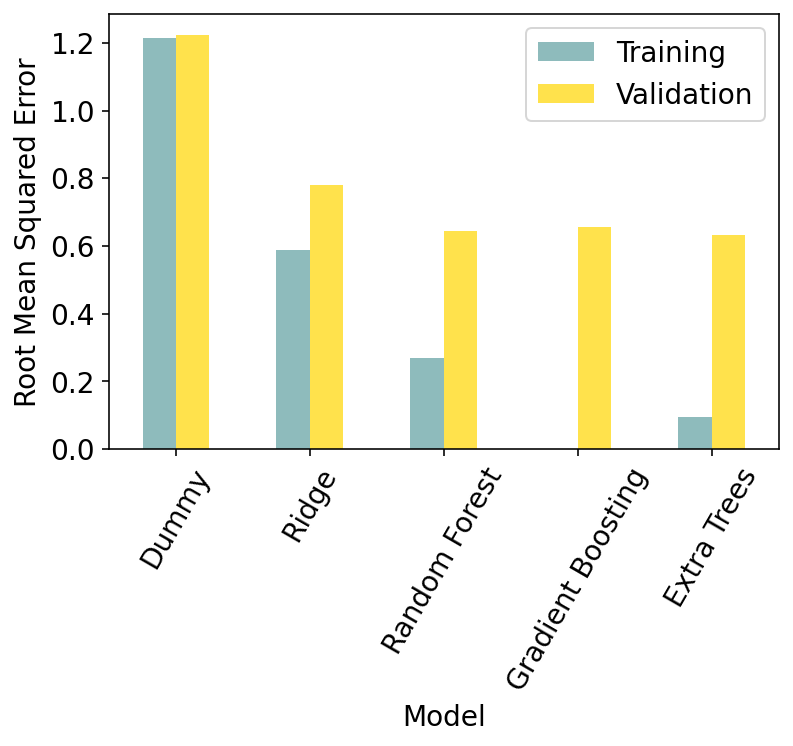

In [47]:
ax = df_metrics_RFE.plot('Model',['rMSE_train','rMSE_val'],kind='bar',fontsize=14,rot=60,colors = ['cadetblue','gold'],alpha=0.7)
ax.set_ylabel('Root Mean Squared Error')
ax.legend(['Training', 'Validation'])
ax.set_xticklabels(['Dummy','Ridge','Random Forest','Gradient Boosting','Extra Trees'])

[Text(0, 0, 'Dummy'),
 Text(0, 0, 'Ridge'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Gradient Boosting'),
 Text(0, 0, 'Extra Trees')]

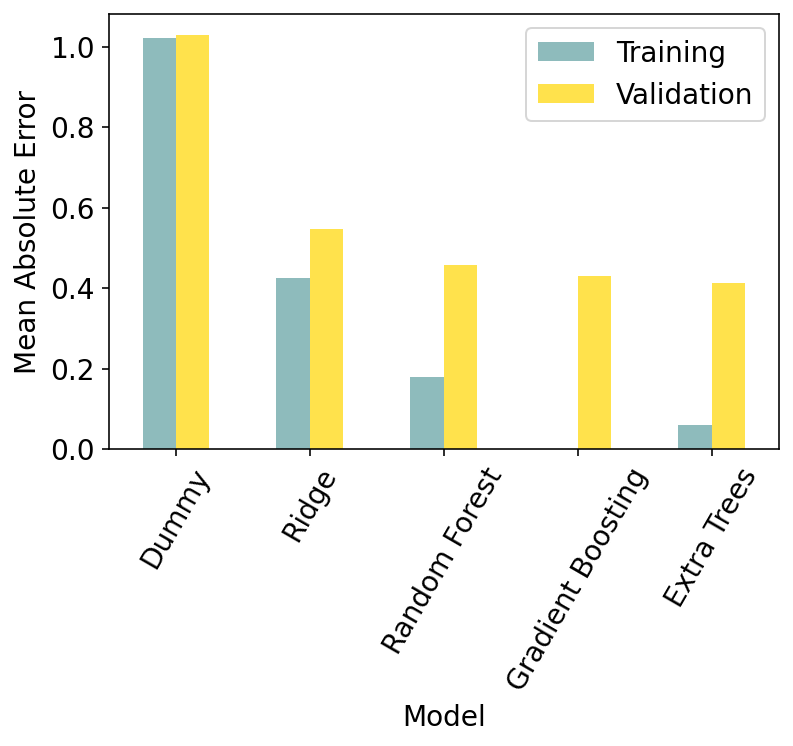

In [48]:
ax = df_metrics_RFE.plot('Model',['MAE_train','MAE_val'],kind='bar',fontsize=14,rot=60,colors = ['cadetblue','gold'],alpha=0.7)
ax.set_ylabel('Mean Absolute Error')
ax.legend(['Training', 'Validation'])
ax.set_xticklabels(['Dummy','Ridge','Random Forest','Gradient Boosting','Extra Trees'])

[Text(0, 0, 'Dummy'),
 Text(0, 0, 'Ridge'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Gradient Boosting'),
 Text(0, 0, 'Extra Trees')]

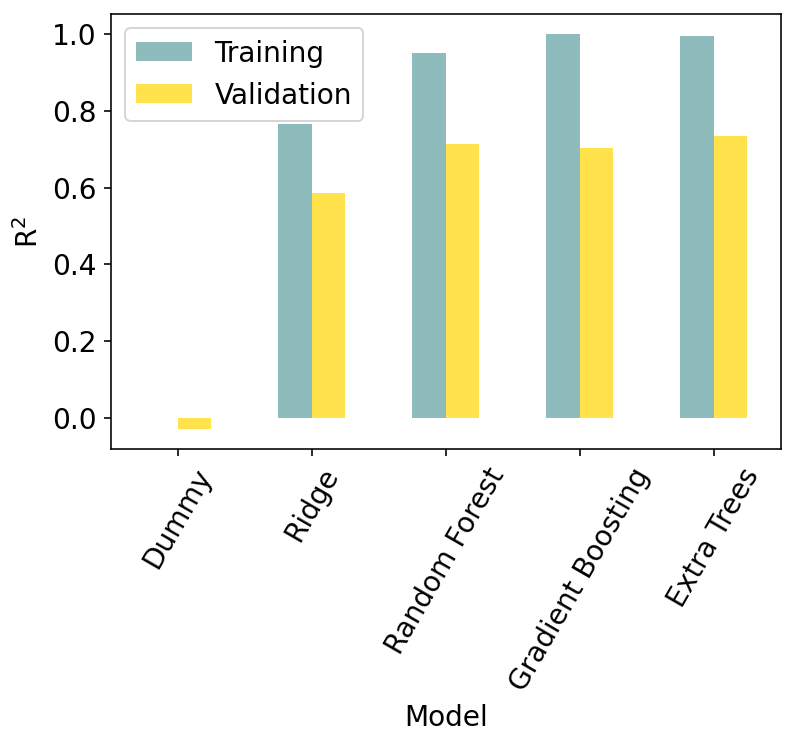

In [49]:
ax = df_metrics_RFE.plot('Model',['r2_train','r2_val'],kind='bar',fontsize=14,rot=60,colors = ['cadetblue','gold'],alpha=0.7)
ax.set_ylabel('R$^2$')
ax.legend(['Training', 'Validation'])
ax.set_xticklabels(['Dummy','Ridge','Random Forest','Gradient Boosting','Extra Trees'])

[Text(0, 0, 'R$^2$'), Text(0, 0, 'rMSE'), Text(0, 0, 'MAE')]

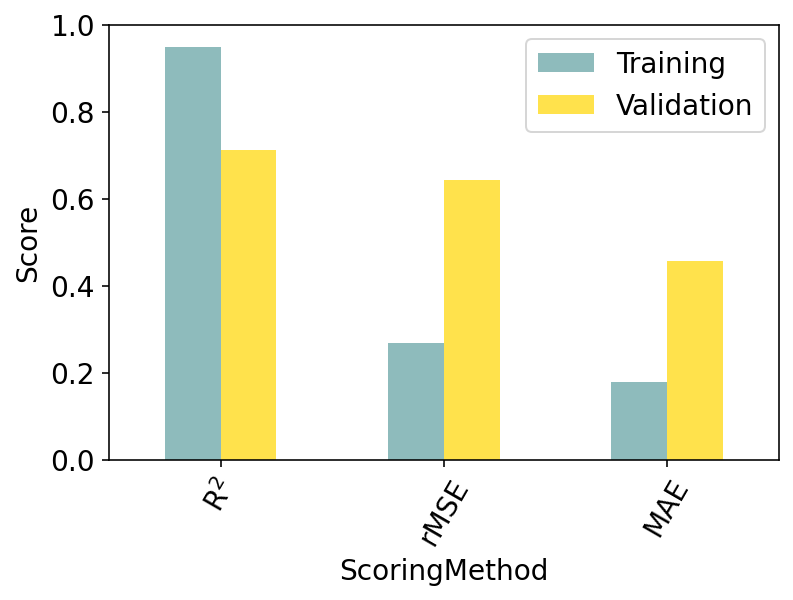

In [50]:
RF_Scores = pd.DataFrame({'ScoringMethod':['R$^2$','MSE','MAE'],
                          'Training':[df_metrics_RFE['r2_train'][2],df_metrics_RFE['rMSE_train'][2],
                                      df_metrics_RFE['MAE_train'][2]],
                          'Validation':[df_metrics_RFE['r2_val'][2],df_metrics_RFE['rMSE_val'][2],
                                      df_metrics_RFE['MAE_val'][2]]})

ax = RF_Scores.plot('ScoringMethod',['Training','Validation'],kind='bar',fontsize=14,rot=60,colors = ['cadetblue','gold'],alpha=0.7)
ax.set_ylabel('Score')
ax.set_ylim(0.0,1.0)
ax.legend(['Training', 'Validation'])
ax.set_xticklabels(['R$^2$','rMSE','MAE'])

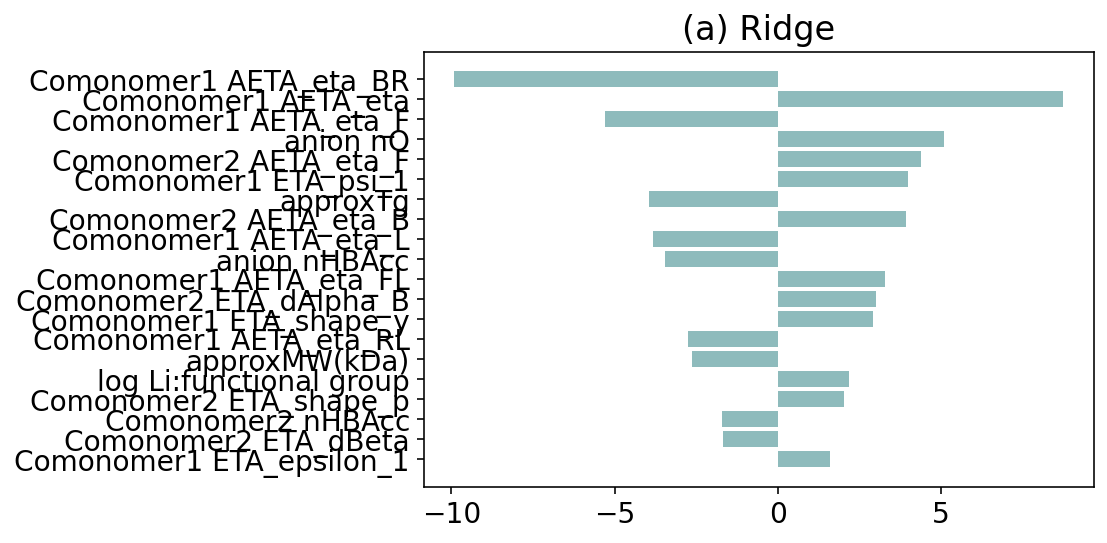

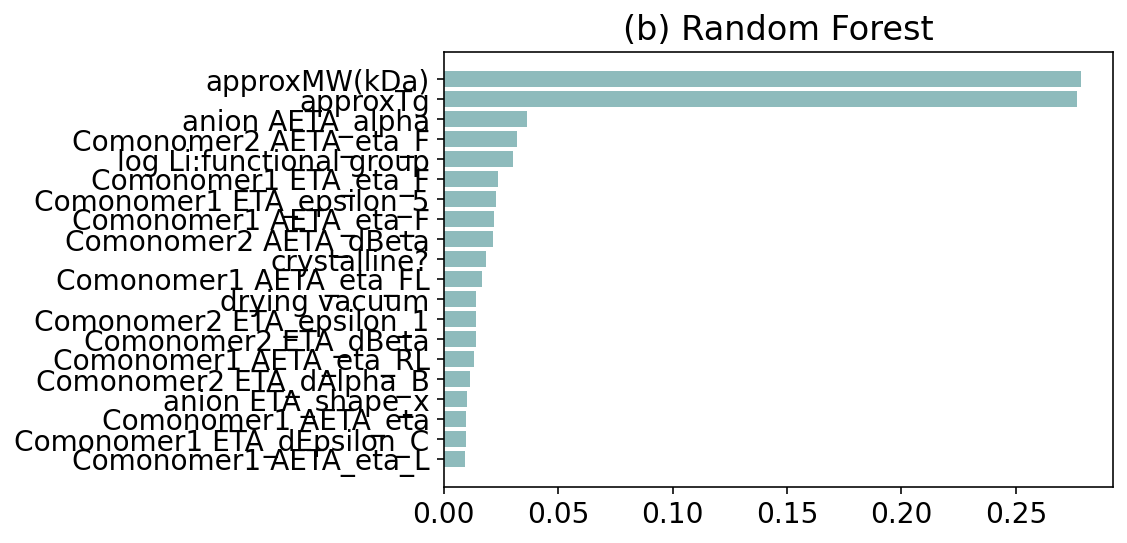

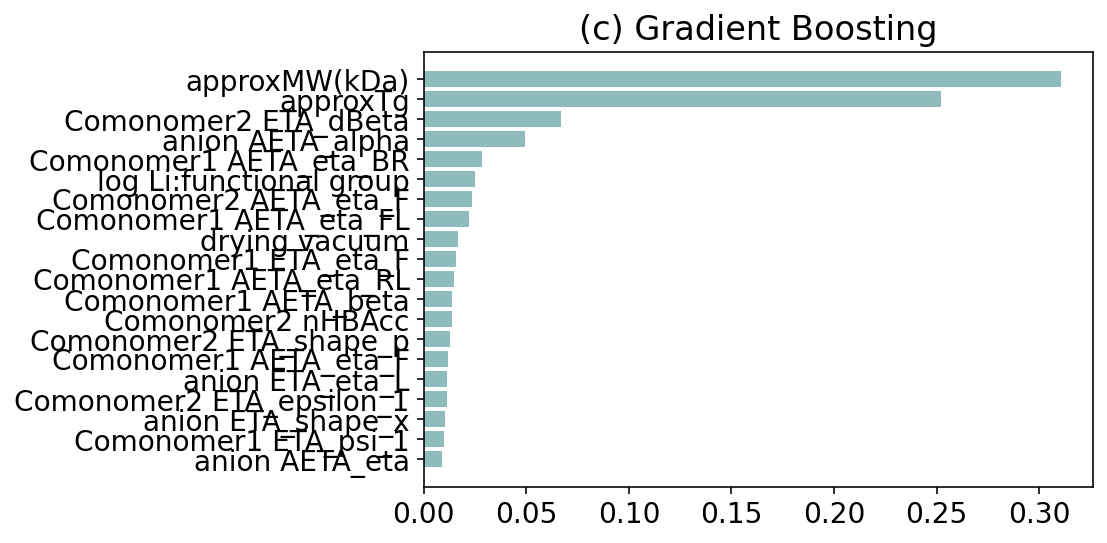

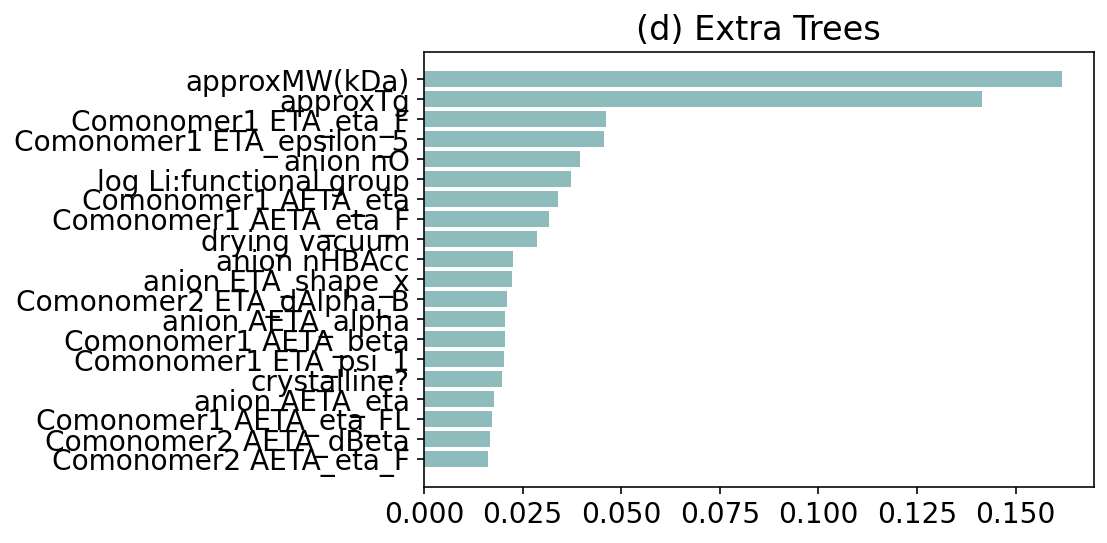

In [51]:
model = ['Dummy','(a) Ridge','(b) Random Forest','(c) Gradient Boosting','(d) Extra Trees']
for index in [1,2,3,4]: #,5
    Descriptors = pd.DataFrame()
    Descriptors['descriptor'] = df_metrics_RFE['Features'][index]
    Descriptors['coefficient'] = df_metrics_RFE['Feature importance'][index]
    Descriptors['abs_coeff'] = [abs(n) for n in Descriptors['coefficient']]
    ordered_importance = Descriptors.sort_values(by = ['abs_coeff'],ascending = False)
    plt.figure()
    ax=plt.axes()
    ax.barh(ordered_importance['descriptor'][0:20],ordered_importance['coefficient'][0:20],color = 'cadetblue',alpha=0.7)
    ax.invert_yaxis()
    plt.title(model[index])
    plt.show()

In [52]:
Descriptors = pd.DataFrame()
Descriptors['descriptor'] = df_metrics_RFE['Features'][2]
Descriptors['coefficient'] = df_metrics_RFE['Feature importance'][2]
Descriptors['abs_coeff'] = [abs(n) for n in Descriptors['coefficient']]
ordered_importance = Descriptors.sort_values(by = ['abs_coeff'],ascending = False)
ordered_importance['descriptor'][0:10]


24               approxMW(kDa)
25                    approxTg
31            anion AETA_alpha
5        Comonomer2 AETA_eta_F
8      log Li:functional group
2         Comonomer1 ETA_eta_F
21    Comonomer1 ETA_epsilon_5
16       Comonomer1 AETA_eta_F
34       Comonomer2 AETA_dBeta
20                crystalline?
Name: descriptor, dtype: object

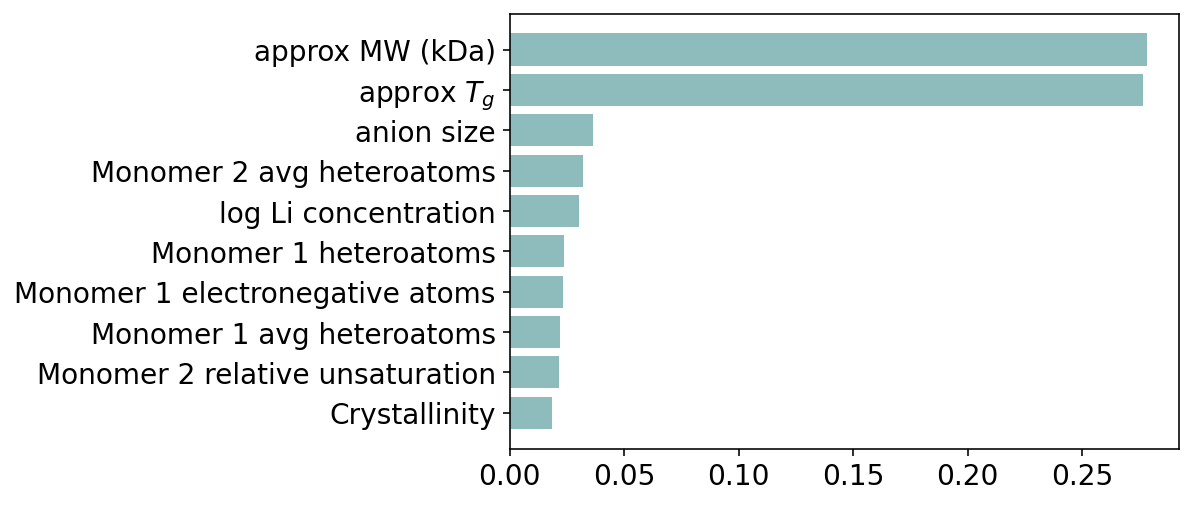

In [53]:
Features_bar = ['approx MW (kDa)','approx $T_g$','anion size',
               'Monomer 2 avg heteroatoms','log Li concentration',
                'Monomer 1 heteroatoms','Monomer 1 electronegative atoms',
                'Monomer 1 avg heteroatoms',
                'Monomer 2 relative unsaturation','Crystallinity']
plt.figure()
ax=plt.axes()
ax.barh(Features_bar,ordered_importance['coefficient'][0:10],color = 'cadetblue',alpha=0.7)
ax.invert_yaxis()
# plt.title('RF Feature Importances')
plt.show()

### Redo RFE on samples without Tg, MW, etc. to see possibility of not using experimental features

In [54]:
X_train.columns[100:200]

Index(['Comonomer2 ETA_eta_FL', 'Comonomer2 AETA_eta_FL',
       'Comonomer2 ETA_eta_B', 'Comonomer2 AETA_eta_B',
       'Comonomer2 ETA_eta_BR', 'Comonomer2 AETA_eta_BR',
       'Comonomer2 ETA_dAlpha_A', 'Comonomer2 ETA_dAlpha_B',
       'Comonomer2 ETA_epsilon_1', 'Comonomer2 ETA_epsilon_2',
       'Comonomer2 ETA_epsilon_3', 'Comonomer2 ETA_epsilon_5',
       'Comonomer2 ETA_dEpsilon_B', 'Comonomer2 ETA_dEpsilon_D',
       'Comonomer2 ETA_dBeta', 'Comonomer2 AETA_dBeta', 'Comonomer2 ETA_psi_1',
       'Comonomer2 ETA_dPsi_A', 'Comonomer2 ETA_dPsi_B', 'anion apol',
       'anion bpol', 'anion nHBAcc', 'anion nHBDon', 'anion nRot',
       'anion RotRatio', 'anion Vabc', 'anion MW', 'anion nAcid',
       'anion nBase', 'anion nSpiro', 'anion nBridgehead', 'anion nH',
       'anion nB', 'anion nC', 'anion nN', 'anion nO', 'anion nS', 'anion nF',
       'anion nBr', 'anion nI', 'anion AETA_alpha', 'anion ETA_shape_p',
       'anion ETA_shape_y', 'anion ETA_shape_x', 'anion ETA_beta',
  

In [55]:
dropcols = ['crystalline?', 'drying temp','drying time (h)', 'drying vacuum','approxTg', 'approxMW(kDa)',]
X_train_noEXP = X_train.drop(columns = dropcols)
X_test_noEXP = X_test.drop(columns = dropcols)

In [56]:
rf_elim = RandomForestRegressor(random_state=SEED)

rfecv = RFECV(estimator=rf_elim, step=1, cv=kfold,scoring='neg_mean_squared_error')
rfecv.fit(X_train_noEXP, np.ravel(y_train))

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RFECV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
      estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators='warn', n_jobs=None,
                                      oob_score=False, random_state=1,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [57]:
rfecv.n_features_

115

In [58]:
feature_RFE = pd.DataFrame({'Feature':X_train_noEXP.columns,'Ranking':rfecv.ranking_})
sorted_feature_RFE = feature_RFE.sort_values(by='Ranking',ascending=True)
sorted_feature_RFE[0:rfecv.n_features_]

Feature  Ranking
0         Comonomer percentage        1
115                 anion apol        1
113      Comonomer2 ETA_dPsi_A        1
112       Comonomer2 ETA_psi_1        1
111      Comonomer2 AETA_dBeta        1
..                         ...      ...
14               Comonomer1 nO        1
50   Comonomer1 ETA_dEpsilon_A        1
52   Comonomer1 ETA_dEpsilon_C        1
53   Comonomer1 ETA_dEpsilon_D        1
54        Comonomer1 ETA_dBeta        1

[115 rows x 2 columns]

In [59]:
X_train_RFE_noEXP = X_train_noEXP[np.array(sorted_feature_RFE['Feature'][0:rfecv.n_features_])]

X_test_RFE_noEXP =  X_test_noEXP[np.array(sorted_feature_RFE['Feature'][0:rfecv.n_features_])]

In [60]:
train_name = 'Train_noEXP_RFE_7-14_2020.csv'
test_name = 'Test__noEXP_RFE_7-14_2020.csv'
file_path = r'C:\Users\nicol\Box Sync\Personal\Research\DataMining_PolymerElectrolyte_Review\DataSpreadsheets\ML_DataSplits\_' 
file_train = file_path + train_name
file_test = file_path + test_name

train_data_RFE = pd.concat([X_train_RFE_noEXP,y_train],axis=1)
test_data_RFE = pd.concat([X_test_RFE_noEXP,y_test],axis=1)
train_data_RFE.to_csv(file_train, sep=',',index = False)
test_data_RFE.to_csv(file_test, sep=',',index = False)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean test scores (ridge): [130.28858931   6.14564057   1.04231124   0.84501933   0.81600992
   0.82331882   0.83318292   0.85033609   0.87594867   1.14636491]
Mean train scores (ridge): [0.23120665 0.24671716 0.29644417 0.33718275 0.3638282  0.44895262
 0.49086348 0.5989677  0.66267046 1.03549947]


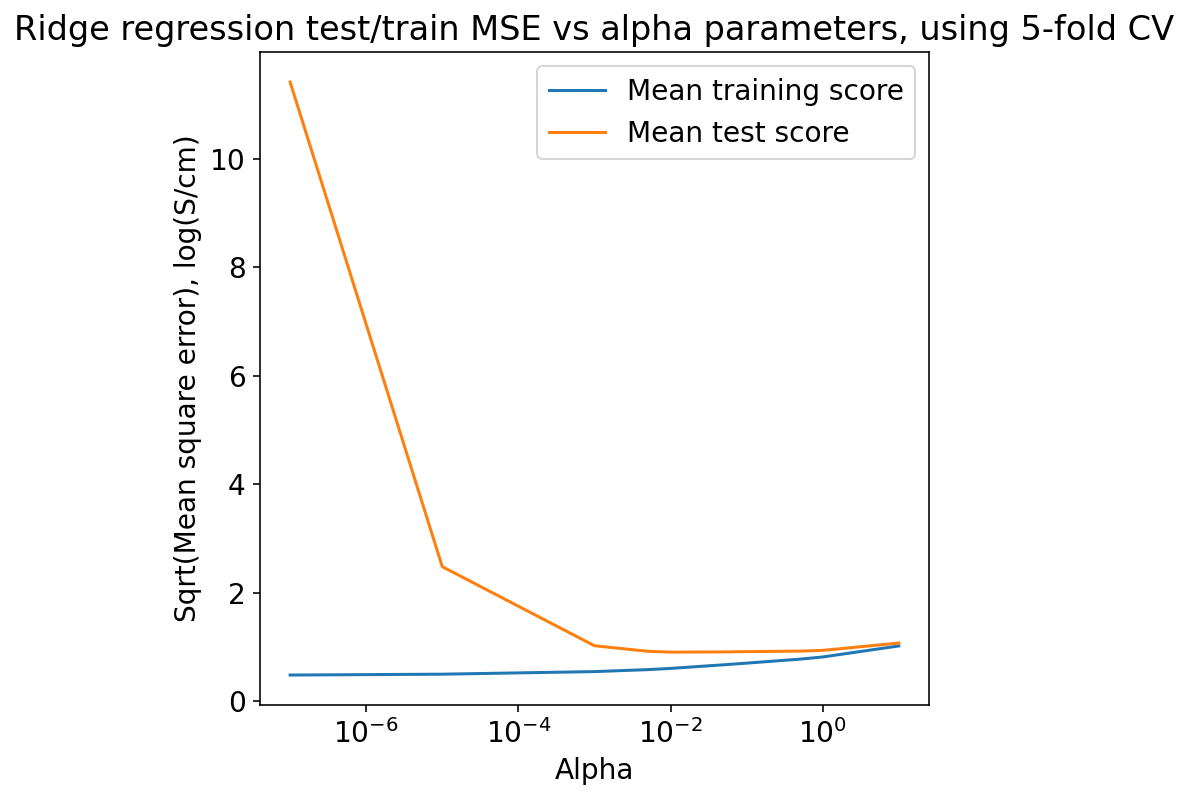

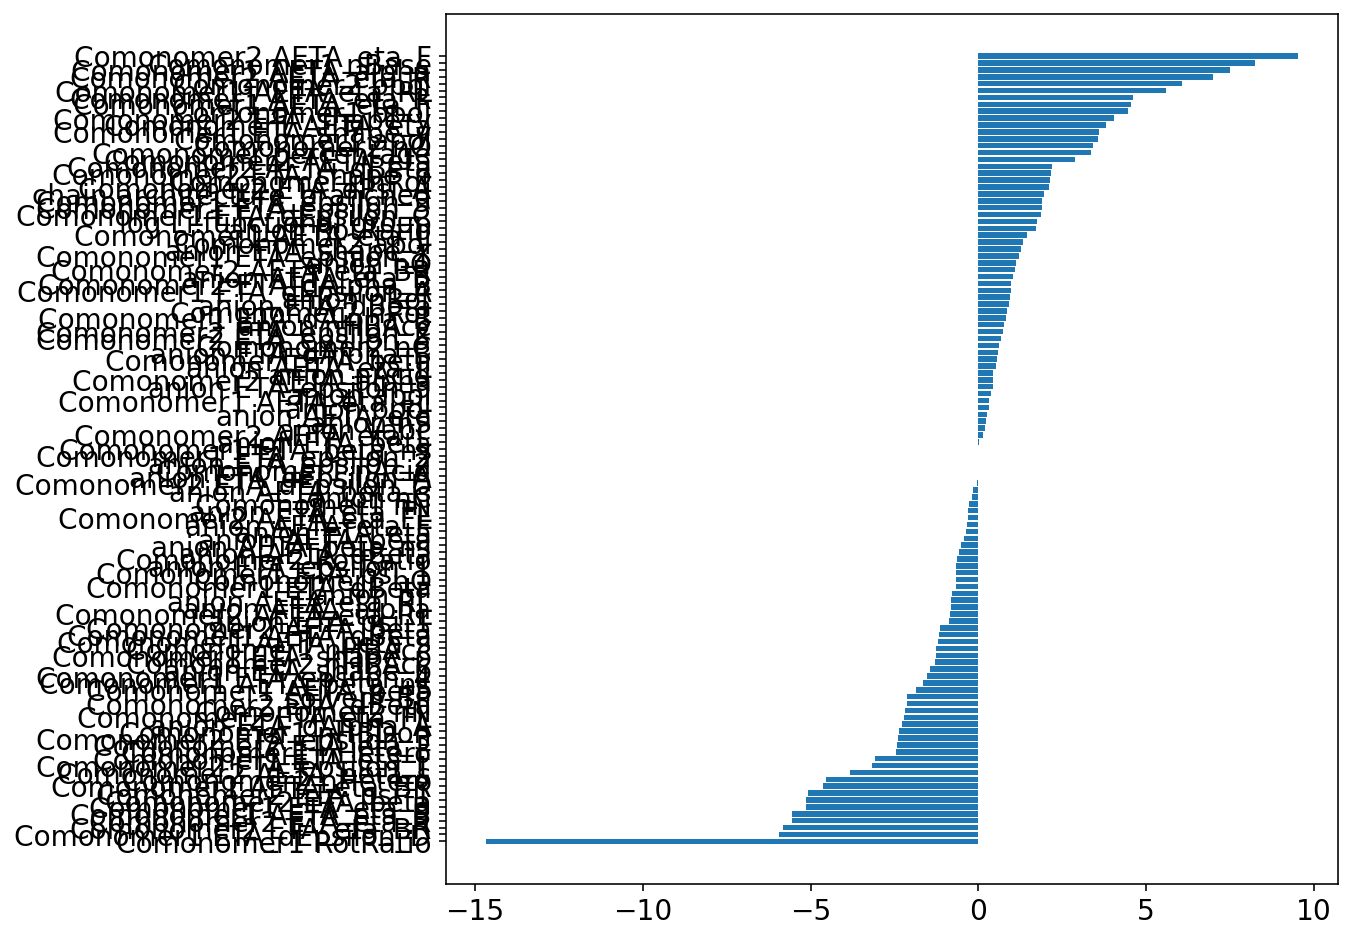

In [61]:
ridge_clf.fit(X_train_RFE_noEXP,y_train)

mean_test_scores = -np.array(ridge_clf.cv_results_['mean_test_score'])
print('Mean test scores (ridge):',mean_test_scores)

mean_train_scores = -np.array(ridge_clf.cv_results_['mean_train_score'])
print('Mean train scores (ridge):',mean_train_scores)

fig = plt.figure(figsize=(6, 6))
# plt.subplot(1, 1, 1)
plt.title('Ridge regression test/train MSE vs alpha parameters, using 5-fold CV')
plt.plot(param_grid_ridge['ridge__alpha'], (np.sqrt(mean_train_scores)),label='Mean training score')
plt.plot(param_grid_ridge['ridge__alpha'], (np.sqrt(mean_test_scores)), label='Mean test score')
plt.legend(loc='upper right')
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('Sqrt(Mean square error), log(S/cm)')#Mean square error
# fig.tight_layout()
plt.show()


ridge_best_sp = ridge_clf.best_estimator_
ridge_best_sp.fit(X_train_RFE_noEXP,y_train)

ridge_coefs_sp = ridge_best_sp.named_steps['ridge'].coef_[0]
Descriptor_rr_df_sp = pd.DataFrame()
Descriptor_rr_df_sp['descriptor'] = X_train_RFE_noEXP.columns
Descriptor_rr_df_sp['ridge_coefficient'] = ridge_coefs_sp

ordered_importance_rr_sp = Descriptor_rr_df_sp.sort_values(by = ['ridge_coefficient'],ascending = False)
plt.figure(figsize=(8,8))
ax=plt.axes()
ax.barh(ordered_importance_rr_sp['descriptor'],ordered_importance_rr_sp['ridge_coefficient'])
ax.invert_yaxis()
# plt.xticks(rotation=90)
# make_axes_area_auto_adjustable(ax)
plt.show()

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean test scores: [0.64677325 0.63654809 0.64013306 0.65457954 0.52198976 0.54352974
 0.54992362 0.56007885 0.52717902 0.51848194 0.51593381 0.532557
 0.51660525 0.51447905 0.50525099 0.52446973]
Mean train scores: [0.29711257 0.26698401 0.26452433 0.26257043 0.15624678 0.1286832
 0.1248029  0.12119456 0.11500417 0.08983673 0.085643   0.08275874
 0.10676843 0.07969617 0.07679953 0.0741894 ]


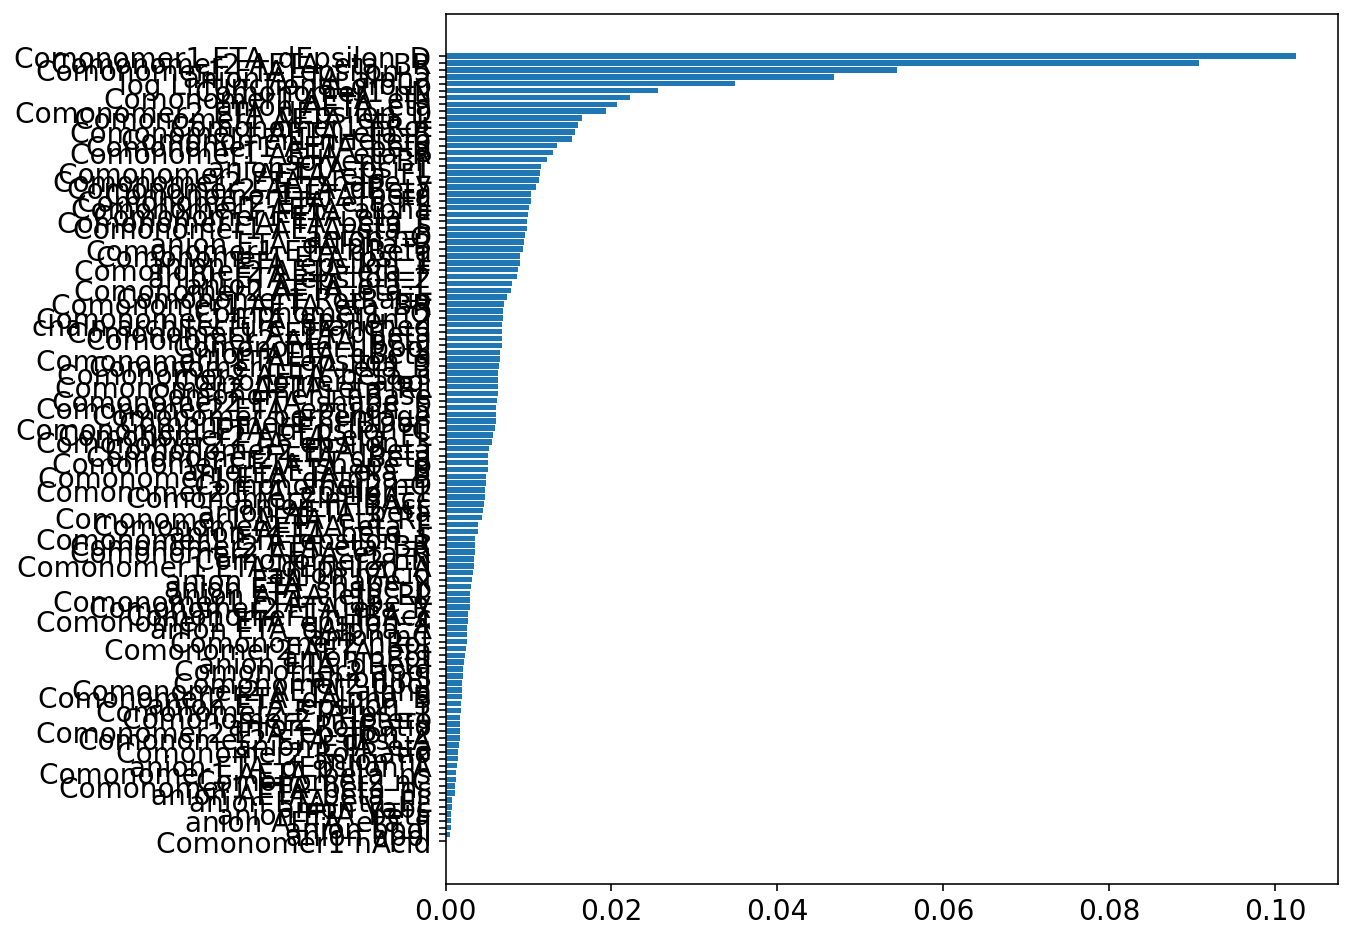

In [62]:
pipe_rf = make_pipeline(StandardScaler(), Normalizer(), RandomForestRegressor(random_state=SEED))
param_grid_rf = {'randomforestregressor__n_estimators':[10,50,100,500],
                'randomforestregressor__max_depth':[4,6,8,10]}
rf_grid_sp = GridSearchCV(pipe_rf,param_grid_rf,scoring=scoring, cv=kfold,return_train_score=True)

rf_grid_sp.fit(X_train_RFE_noEXP,np.ravel(y_train))
mean_test_scores_rf= -np.array(rf_grid_sp.cv_results_['mean_test_score'])
print('Mean test scores:', mean_test_scores_rf)
mean_train_scores_rf = -np.array(rf_grid_sp.cv_results_['mean_train_score'])
print('Mean train scores:', mean_train_scores_rf)

rf_grid_df_sp = pd.DataFrame.from_dict(rf_grid_sp.cv_results_)
# rf_grid_df

rf_best_sp = rf_grid_sp.best_estimator_
rf_best_sp.fit(X_train_RFE_noEXP,np.ravel(y_train))

importance = rf_best_sp.named_steps['randomforestregressor'].feature_importances_

Descriptor_rf_df_sp = pd.DataFrame()
Descriptor_rf_df_sp['descriptor'] = X_train_RFE_noEXP.columns
Descriptor_rf_df_sp['rf_coefficient'] = importance
# Descriptor_rf_df.head()

ordered_importance_rf_sp = Descriptor_rf_df_sp.sort_values(by = ['rf_coefficient'],ascending = False)

plt.figure(figsize=(8,8))
ax=plt.axes()
ax.barh(ordered_importance_rf_sp['descriptor'],ordered_importance_rf_sp['rf_coefficient'])
ax.invert_yaxis()
# plt.xticks(rotation=90)
# make_axes_area_auto_adjustable(ax)
plt.show()

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean test scores (MSE): [0.76991092 0.60456397 0.60142194 0.60187529 0.60215211 0.73804543
 0.68392874 0.6846081  0.68662212 0.6866286  0.6785806  0.7083505
 0.71013476 0.71015218 0.7101521  0.74400868 0.79774526 0.80048568
 0.80050343 0.80050342]
Mean train scores (MSE): [0.41555238 0.04480554 0.01949216 0.01144919 0.01143888 0.26020307
 0.01403778 0.01176768 0.01143888 0.01143884 0.2062806  0.01155128
 0.01143953 0.01143884 0.01143884 0.19185202 0.01148424 0.01143888
 0.01143884 0.01143884]


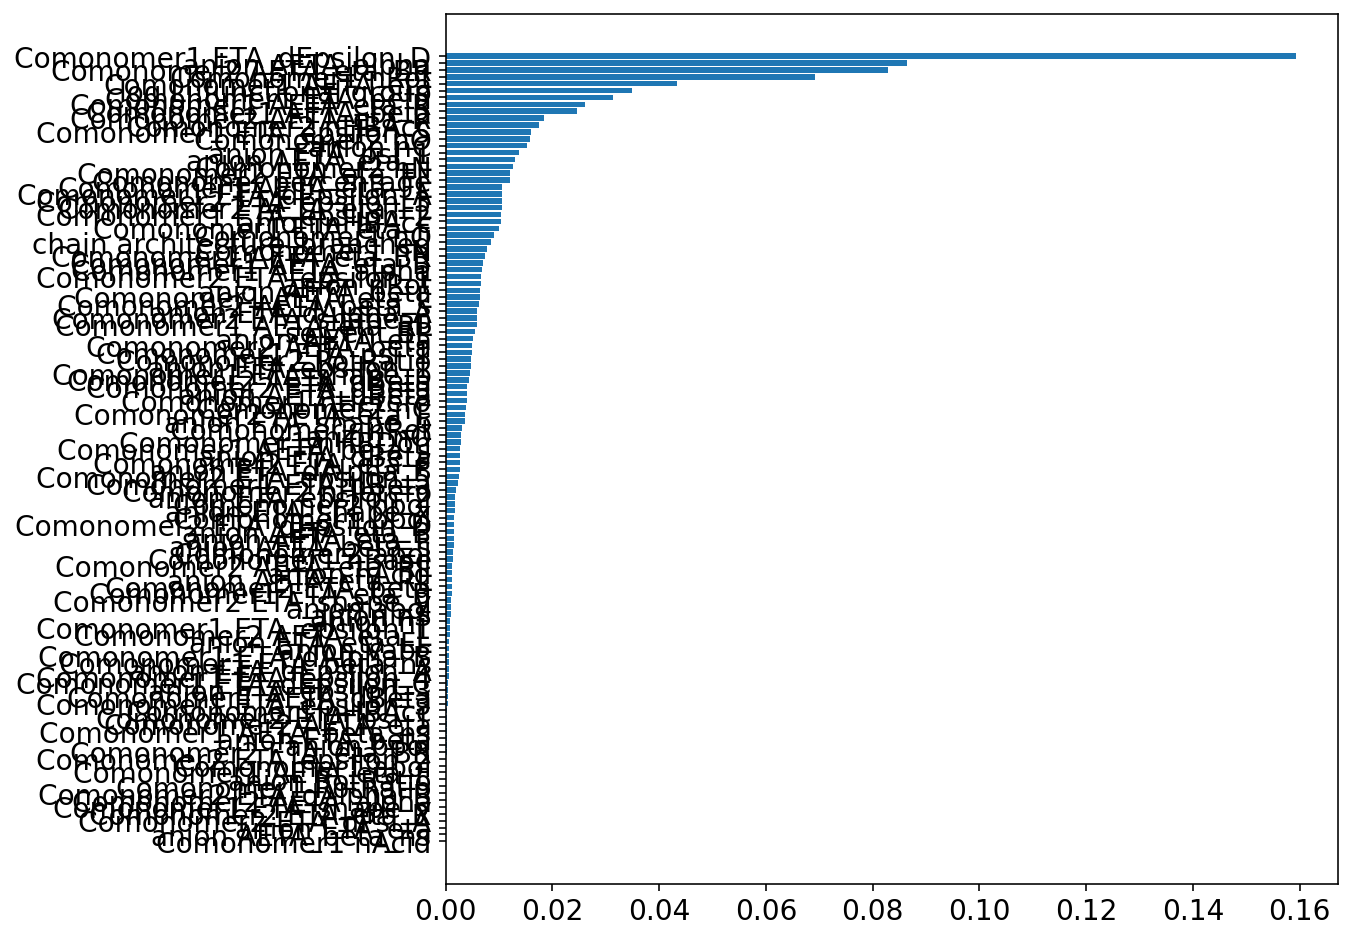

In [63]:
# parameters to play around with: learning_rate, n_estimators, subsample, max_depth

pipe_gbr = make_pipeline(StandardScaler(), Normalizer(), GradientBoostingRegressor(random_state=SEED))
param_grid_gbr = {'gradientboostingregressor__n_estimators':[10,50,100,500,1000],
                'gradientboostingregressor__max_depth':[4,6,8,10]}
gbr_grid = GridSearchCV(pipe_gbr,param_grid_gbr,scoring=scoring, cv=kfold,return_train_score=True)
gbr_grid.fit(X_train_RFE_noEXP,np.ravel(y_train))

mean_test_scores_gbr= -np.array(gbr_grid.cv_results_['mean_test_score'])
print('Mean test scores (MSE):', mean_test_scores_gbr)
mean_train_scores_gbr = -np.array(gbr_grid.cv_results_['mean_train_score'])
print('Mean train scores (MSE):', mean_train_scores_gbr)

gb_best = gbr_grid.best_estimator_
gb_best.fit(X_train_RFE_noEXP,np.ravel(y_train))

importance_gb = gb_best.named_steps['gradientboostingregressor'].feature_importances_
Descriptor_gb_df = pd.DataFrame()
Descriptor_gb_df['descriptor'] = X_train_RFE_noEXP.columns
Descriptor_gb_df['gb_coefficient'] = importance_gb
ordered_importance_gb = Descriptor_gb_df.sort_values(by = ['gb_coefficient'],ascending = False)
plt.figure(figsize=(8,8))
ax=plt.axes()
ax.barh(ordered_importance_gb['descriptor'],ordered_importance_gb['gb_coefficient'])
ax.invert_yaxis()
plt.show()

In [64]:
models = {'ridge':ridge_best_sp,'randomforestregressor':rf_best_sp,'gradientboostingregressor':gb_best} #'lasso':lasso_best,

df_metrics_sp_RFE = df_metrics_RFE.copy()

for model,name in models.items():
    training = cross_validate(name,X_train_RFE_noEXP,np.ravel(y_train),scoring=scores,cv=kfold,return_train_score=True)
    if model == 'ridge':
        descriptorimportance = name.named_steps[model].coef_[0]
    elif model == 'lasso':
        descriptorimportance = name.named_steps[model].coef_
    else:
        descriptorimportance = name.named_steps[model].feature_importances_
    new_row = {'Model':model,'model_params':name.named_steps[model],
           'rMSE_train':np.sqrt(np.mean(-training['train_neg_mean_squared_error'])),
          'rMSE_val':np.sqrt(np.mean(-training['test_neg_mean_squared_error'])),
          'MAE_train':np.mean(-training['train_neg_mean_absolute_error']),
          'MAE_val':np.mean(-training['test_neg_mean_absolute_error']),
          'r2_train':np.mean(training['train_r2']),
          'r2_val':np.mean(training['test_r2']),
              'Feature importance':descriptorimportance,
              'Features':X_train_RFE_noEXP.columns}
    df_metrics_sp_RFE = df_metrics_sp_RFE.append(new_row,ignore_index=True)
    
df_metrics_sp_RFE

Model  \
0                      Dummy   
1                      ridge   
2      randomforestregressor   
3  gradientboostingregressor   
4        extratreesregressor   
5                      ridge   
6      randomforestregressor   
7  gradientboostingregressor   

                                        model_params  rMSE_train  MAE_train  \
0  DummyRegressor(constant=None, quantile=None, s...    1.215756   1.021189   
1  Ridge(alpha=0.01, copy_X=True, fit_intercept=T...    0.588692   0.426119   
2  (DecisionTreeRegressor(criterion='mse', max_de...    0.269545   0.178907   
3  ([DecisionTreeRegressor(criterion='friedman_ms...    0.000316   0.000268   
4  (ExtraTreeRegressor(criterion='mse', max_depth...    0.095942   0.060830   
5  Ridge(alpha=0.01, copy_X=True, fit_intercept=T...    0.603182   0.429042   
6  (DecisionTreeRegressor(criterion='mse', max_de...    0.277127   0.181995   
7  ([DecisionTreeRegressor(criterion='friedman_ms...    0.139614   0.085152   

   r2_train  rMSE_val   MAE_val    r2_val  \
0  0.000000  1.223626  1.029035 -0.030093   
1  0.765530  0.779415  0.546378  0.586606   
2  0.950705  0.643986  0.457261  0.712589   
3  1.000000  0.656088  0.430542  0.703332   
4  0.993786  0.633198  0.413211  0.733168   
5  0.753528  0.903176  0.631278  0.388611   
6  0.948103  0.711471  0.474530  0.666793   
7  0.986968  0.776273  0.495069  0.591723   

                                            Features  \
0                                                NaN   
1  Index(['Comonomer1 ETA_epsilon_1', 'Comonomer2...   
2  Index(['Comonomer1 ETA_epsilon_1', 'Comonomer2...   
3  Index(['Comonomer1 ETA_epsilon_1', 'Comonomer2...   
4  Index(['Comonomer1 ETA_epsilon_1', 'Comonomer2...   
5  Index(['Comonomer percentage', 'anion apol', '...   
6  Index(['Comonomer percentage', 'anion apol', '...   
7  Index(['Comonomer percentage', 'anion apol', '...   

                                  Feature importance  
0                                                NaN  
1  [1.6005891210780459, 3.9349900287401356, 1.598...  
2  [0.0032487456200667518, 0.00729758290087686, 0...  
3  [0.0018491804178002063, 0.001596436664165104, ...  
4  [0.015033982524146767, 0.01419867458606432, 0....  
5  [3.3652364658150926, 0.38872601978993643, 2.11...  
6  [0.006068299665818024, 0.0004902550406966893, ...  
7  [0.012006085250356461, 0.0010829784758900228, ...

C:\Users\nicol\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


[Text(0, 0, 'Dummy'),
 Text(0, 0, 'Ridge'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Gradient Boosting'),
 Text(0, 0, 'Extra Trees'),
 Text(0, 0, 'Ridge no exp'),
 Text(0, 0, 'Random Forest no exp'),
 Text(0, 0, 'Gradient Boosting no exp')]

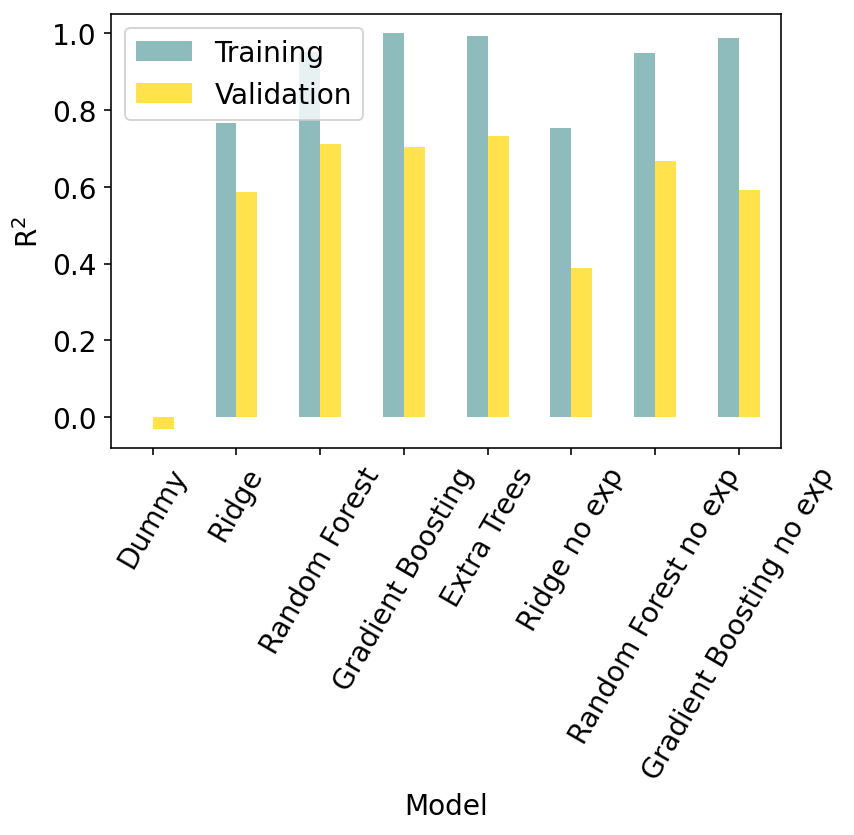

In [65]:
ax = df_metrics_sp_RFE.plot('Model',['r2_train','r2_val'],kind='bar',fontsize=14,rot=60,colors = ['cadetblue','gold'],alpha=0.7)
ax.set_ylabel('R$^2$')
ax.legend(['Training', 'Validation'])
ax.set_xticklabels(['Dummy','Ridge','Random Forest','Gradient Boosting','Extra Trees','Ridge no exp',
                    'Random Forest no exp', 'Gradient Boosting no exp'])

[Text(0, 0, 'R$^2$'), Text(0, 0, 'rMSE'), Text(0, 0, 'MAE')]

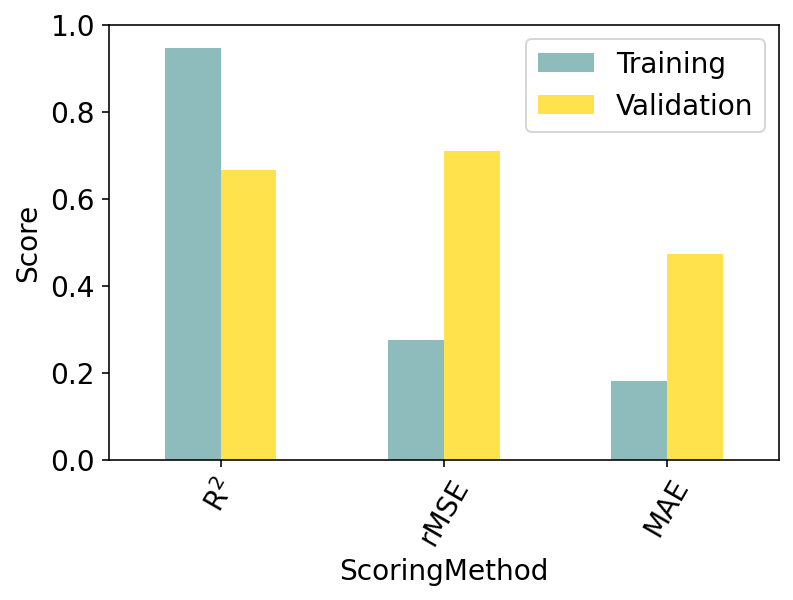

In [66]:
RF_Scores_sp = pd.DataFrame({'ScoringMethod':['R$^2$ noEXP','MSE noEXP','MAE noEXP'],
                          'Training':[df_metrics_sp_RFE['r2_train'][6],df_metrics_sp_RFE['rMSE_train'][6],
                                      df_metrics_sp_RFE['MAE_train'][6]],
                          'Validation':[df_metrics_sp_RFE['r2_val'][6],df_metrics_sp_RFE['rMSE_val'][6],
                                      df_metrics_sp_RFE['MAE_val'][6]]})


ax = RF_Scores_sp.plot('ScoringMethod',['Training','Validation'],kind='bar',fontsize=14,rot=60,colors = ['cadetblue','gold'],alpha=0.7)
ax.set_ylabel('Score')
ax.set_ylim(0.0,1.0)
ax.legend(['Training', 'Validation'])
ax.set_xticklabels(['R$^2$','rMSE','MAE'])

In [68]:
RF_Scores_all = pd.concat([RF_Scores,RF_Scores_sp],ignore_index=True)
RF_Scores_all = RF_Scores_all.reindex([0,3,1,4,2,5])
RF_Scores_all

ScoringMethod  Training  Validation
0         R$^2$  0.950705    0.712589
3   R$^2$ noEXP  0.948103    0.666793
1           MSE  0.269545    0.643986
4     MSE noEXP  0.277127    0.711471
2           MAE  0.178907    0.457261
5     MAE noEXP  0.181995    0.474530

[Text(0, 0, 'R$^2$'),
 Text(0, 0, 'R$^2$ no exp'),
 Text(0, 0, 'rMSE'),
 Text(0, 0, 'rMSE no exp'),
 Text(0, 0, 'MAE'),
 Text(0, 0, 'MAE no exp')]

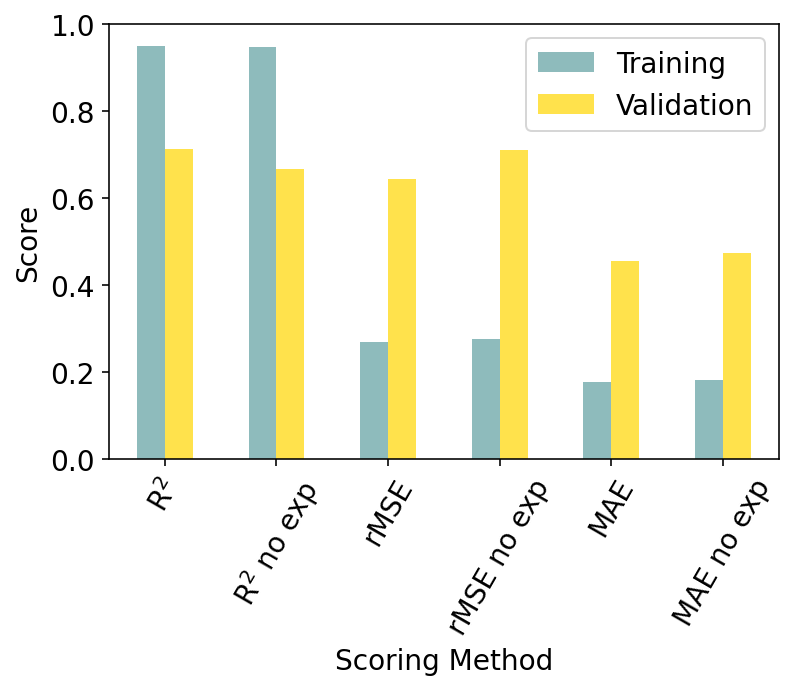

In [69]:
ax = RF_Scores_all.plot('ScoringMethod',['Training','Validation'],kind='bar',fontsize=14,rot=60,colors = ['cadetblue','gold'],alpha=0.7)
ax.set_ylabel('Score')
ax.set_xlabel('Scoring Method')
ax.set_ylim(0.0,1.0)
ax.legend(['Training', 'Validation'])
ax.set_xticklabels(['R$^2$','R$^2$ no exp','rMSE', 'rMSE no exp', 'MAE','MAE no exp'])

In [70]:
RF_Scores_r2 = RF_Scores_all.drop(index = [1,2,4,5])


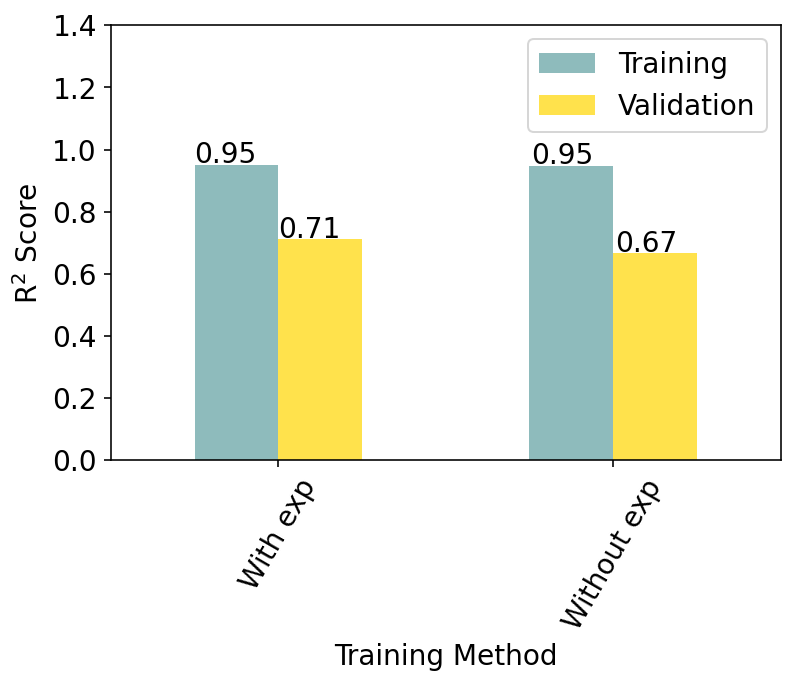

In [71]:

ax = RF_Scores_r2.plot('ScoringMethod',['Training','Validation'],kind='bar',fontsize=14,rot=60,colors = ['cadetblue','gold'],alpha=0.7)
ax.set_ylabel('R$^2$ Score')
ax.set_xlabel('Training Method')
ax.set_ylim(0.0,1.4)
ax.legend(['Training', 'Validation'])
ax.set_xticklabels(['With exp','Without exp'])
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

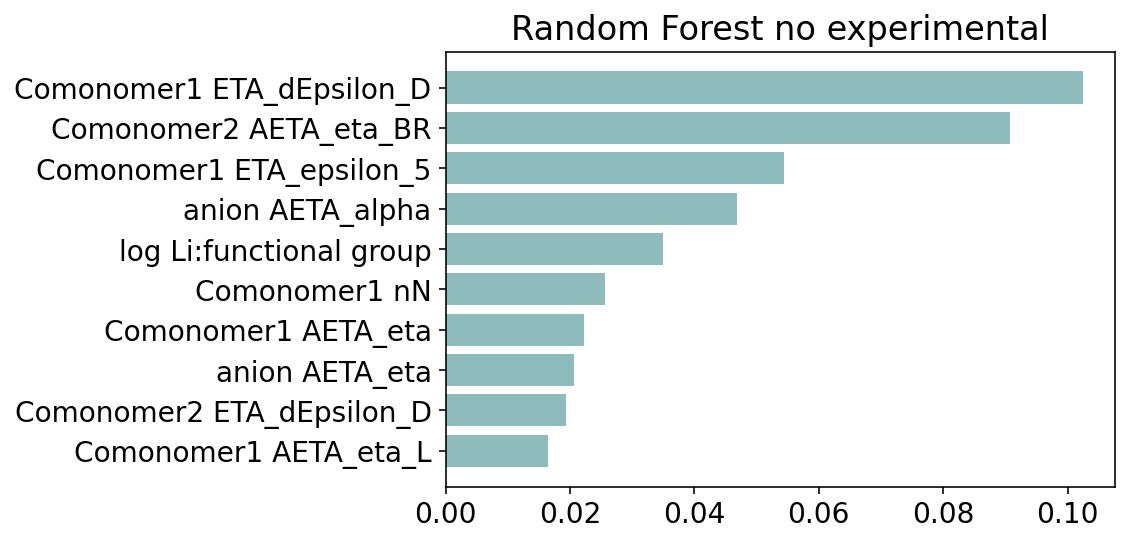

In [72]:
model = ['Dummy','(a) Ridge','(b) Random Forest','(c) Gradient Boosting','(d) Extra Trees','Ridge no MW,$T_g$','Random Forest no experimental']

for index in [6]: #,5
    Descriptors = pd.DataFrame()
    Descriptors['descriptor'] = df_metrics_sp_RFE['Features'][index]
    Descriptors['coefficient'] = df_metrics_sp_RFE['Feature importance'][index]
    Descriptors['abs_coeff'] = [abs(n) for n in Descriptors['coefficient']]
    ordered_importance = Descriptors.sort_values(by = ['abs_coeff'],ascending = False)
    plt.figure()
    ax=plt.axes()
    ax.barh(ordered_importance['descriptor'][0:10],ordered_importance['coefficient'][0:10],color = 'cadetblue',alpha=0.7)
    ax.invert_yaxis()
    plt.title(model[index])
    plt.show()

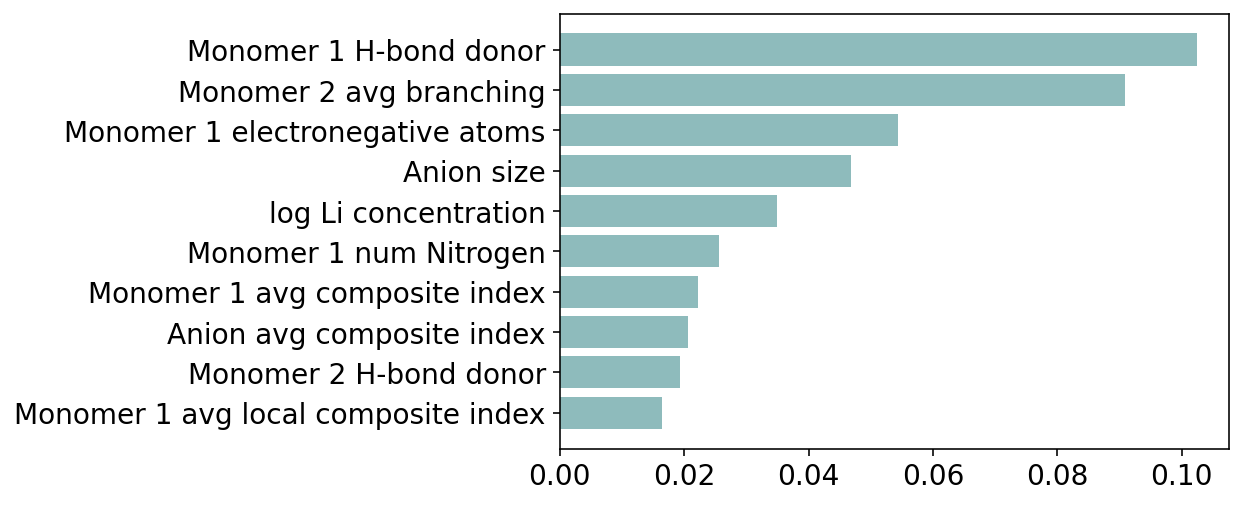

In [73]:
# Rename values with readable names
Descriptors_RFNoExp = pd.DataFrame()
Descriptors_RFNoExp['descriptor'] = df_metrics_sp_RFE['Features'][6]
Descriptors_RFNoExp['coefficient'] = df_metrics_sp_RFE['Feature importance'][6]
Descriptors_RFNoExp['abs_coeff'] = [abs(n) for n in Descriptors_RFNoExp['coefficient']]
ordered_importance = Descriptors_RFNoExp.sort_values(by = ['abs_coeff'],ascending = False)
renamed_descriptor = ['Monomer 1 H-bond donor','Monomer 2 avg branching',
                                            'Monomer 1 electronegative atoms','Anion size','log Li concentration',
                                            'Monomer 1 num Nitrogen','Monomer 1 avg composite index',
                                            'Anion avg composite index','Monomer 2 H-bond donor',
                                            'Monomer 1 avg local composite index']
plt.figure()
ax=plt.axes()
ax.barh(renamed_descriptor,ordered_importance['coefficient'][0:10],color = 'cadetblue',alpha=0.7)
ax.invert_yaxis()
# plt.title('(c) RF no experimental parameters')
plt.show()

## Test random forest model on test data and plot


In [74]:
print('train accuracy: ', rf_best_rfe.score(X_train_RFE,y_train))
print('test accuracy: ', rf_best_rfe.score(X_test_RFE,y_test))

train accuracy:  0.9579561291065242
test accuracy:  0.7423970241426499


In [75]:
rf_test = rf_best_rfe.predict(X_test_RFE)

In [76]:
rf_test_sp = rf_best_sp.predict(X_test_RFE_noEXP)


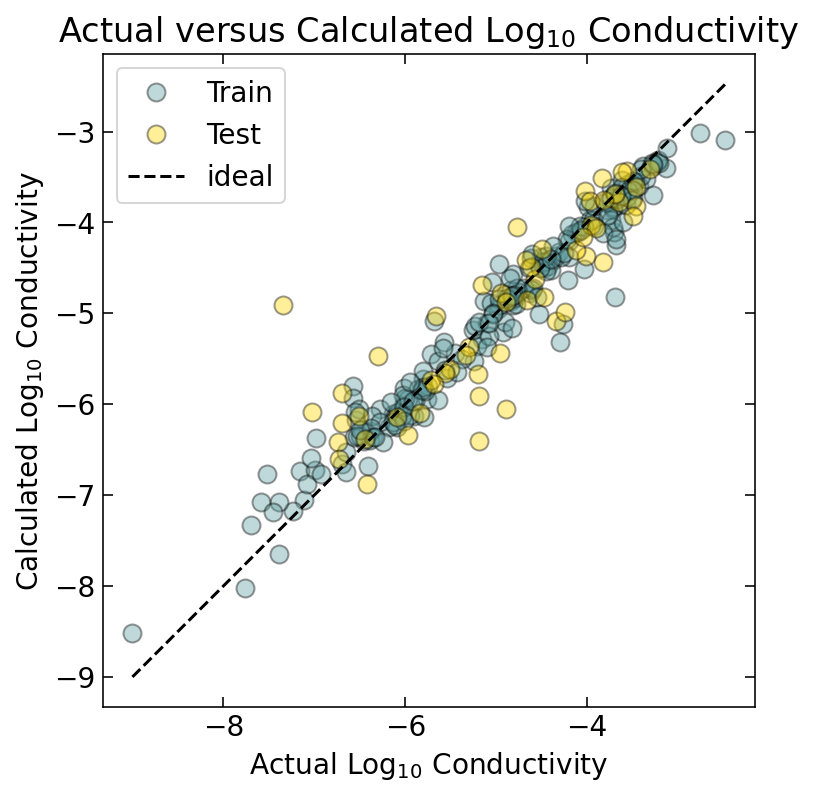

In [78]:
# First look at model including experimental features

y_actual = y_test['logCond60']
y_predicted = rf_test

y_actual_train = y_train['logCond60']
y_predicted_train = rf_best_rfe.predict(X_train_RFE)

plt.figure(figsize=(6,6))
plt.plot(y_actual_train, y_predicted_train,  'o', ms=9, mec='k', mfc='cadetblue', alpha=0.4,label='Train')
plt.plot(y_actual, y_predicted,  'o', ms=9, mec='k', mfc='gold', alpha=0.4,label='Test')
plt.plot([min([min(y_actual_train), min(y_predicted_train)]), max([max(y_actual_train), max(y_predicted_train)])], [min([min(y_actual_train), min(y_predicted_train)]), max([max(y_actual_train), max(y_predicted_train)])], 'k--', label='ideal')
plt.title("Actual versus Calculated Log$_{10}$ Conductivity")
plt.axis('scaled')
plt.tick_params(direction='in', length=5, bottom=True, top=True, left=True, right=True)
plt.xlabel('Actual Log$_{10}$ Conductivity')
plt.ylabel('Calculated Log$_{10}$ Conductivity')
plt.legend(loc='upper left')
plt.show()

In [79]:
r2 = r2_score(y_actual, y_predicted)
mae = mean_absolute_error(y_actual, y_predicted)
mse = mean_squared_error(y_actual, y_predicted)
print(f'r2: {r2:0.4f}')
print(f'mae: {mae:0.4f}')
print(f'mse: {mse:0.4f}')
print(f'rmse: {np.sqrt(mse):0.4f}')

r2: 0.7424
mae: 0.3773
mse: 0.3057
rmse: 0.5529


In [80]:
r2 = r2_score(y_actual, y_predicted)
r2_train = r2_score(y_actual_train,y_predicted_train)
print(f'r2 test: {r2:0.4f}')
print(f'r2 train: {r2_train:0.4f}')

r2 test: 0.7424
r2 train: 0.9580


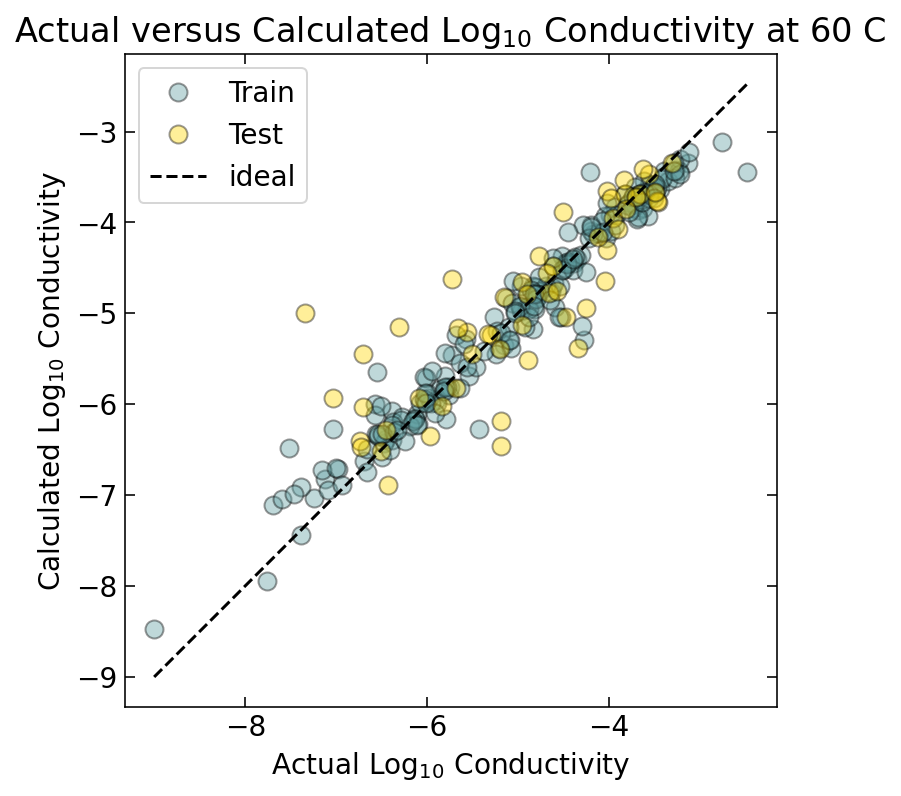

In [81]:
# Now look at model trained without experimental features

y_actual = y_test['logCond60']
y_predicted = rf_test_sp

y_actual_train = y_train['logCond60']
y_predicted_train = rf_best_sp.predict(X_train_RFE_noEXP)

plt.figure(figsize=(6,6))
plt.plot(y_actual_train, y_predicted_train,  'o', ms=9, mec='k', mfc='cadetblue', alpha=0.4,label='Train')
plt.plot(y_actual, y_predicted,  'o', ms=9, mec='k', mfc='gold', alpha=0.4,label='Test') #marker='o', mfc='none', color='#0077be', linestyle='none'
plt.plot([min([min(y_actual_train), min(y_predicted_train)]), max([max(y_actual_train), max(y_predicted_train)])], [min([min(y_actual_train), min(y_predicted_train)]), max([max(y_actual_train), max(y_predicted_train)])], 'k--', label='ideal')
plt.title("Actual versus Calculated Log$_{10}$ Conductivity at 60 C")
plt.axis('scaled')
plt.tick_params(direction='in', length=5, bottom=True, top=True, left=True, right=True)
plt.xlabel('Actual Log$_{10}$ Conductivity')
plt.ylabel('Calculated Log$_{10}$ Conductivity')
plt.legend(loc='upper left')
plt.show()

In [82]:
r2 = r2_score(y_actual, y_predicted)
mae = mean_absolute_error(y_actual, y_predicted)
mse = mean_squared_error(y_actual, y_predicted)
print(f'r2: {r2:0.4f}')
print(f'mae: {mae:0.4f}')
print(f'mse: {mse:0.4f}')
print(f'rmse: {np.sqrt(mse):0.4f}')

r2: 0.7064
mae: 0.4009
mse: 0.3483
rmse: 0.5902
